# Description
## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective

Explore and visualize the dataset.<br>
Build a classification model to predict if the customer is going to churn or not<br>
Optimize the model using appropriate techniques<br>
Generate a set of insights and recommendations that will help the bank<br>
### Data Dictionary:<br>

CLIENTNUM: Client number. Unique identifier for the customer holding the account<br>
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"<br>
Customer_Age: Age in Years<br>
Gender: Gender of the account holder<br>
Dependent_count: Number of dependents<br>
Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.<br>
Marital_Status: Marital Status of the account holder<br>
Income_Category: Annual Income Category of the account holder<br>
Card_Category: Type of Card<br>
Months_on_book: Period of relationship with the bank<br>
Total_Relationship_Count: Total no. of products held by the customer<br>
Months_Inactive_12_mon: No. of months inactive in the last 12 months<br>
Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months<br>
Credit_Limit: Credit Limit on the Credit Card<br>
Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance<br>
Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)<br>
Total_Trans_Amt: Total Transaction Amount (Last 12 months)<br>
Total_Trans_Ct: Total Transaction Count (Last 12 months)<br>
Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter<br>
Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter<br>
Avg_Utilization_Ratio: Represents how much of the available credit the customer spent<br>

# Imports

In [240]:
# Used for data reading and manipulation
import pandas as pd
import numpy as np

# Used for Data Visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Used for imputing missing values
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Used for Model Builing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
)

# Used for spliting the data and Hyperparameter Tuning of the model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)

# used for scaling the data and one hot encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder , LabelBinarizer,LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Used for defining pipelines and personalising them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from xgboost import XGBClassifier

# to calculate the various metrics for evaluation
from sklearn import metrics
from sklearn.metrics import (
    recall_score,
    precision_score,
    accuracy_score,
    f1_score,
    confusion_matrix,
    make_scorer,
)

# To avoid warnings
import warnings

warnings.filterwarnings("ignore")

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)
# To define float format to be displayed
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from pandas import MultiIndex, Int64Index



## Load the data

In [69]:
# Reading the data from the csv file
bdata = pd.read_csv("BankChurners.csv")

In [71]:
# Making a copy of the dataset
data = bdata.copy()

## Checking the shape of the data

In [72]:
# used to check the rows and columns
data.shape

(10127, 21)

#### Observations
The dataset has 10127 rows and 21 columns

In [73]:
# used to view first 5 rows of the dataset
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [74]:
# used to view last 5 rows of the dataset
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

## General Information of the data

In [75]:
# checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Observations
1. Attrition_flag,Gender,Education_Level,Marital_status,Income_Category,Card_category are all object datatype, the rest are all int64 or float64 datatypes.
2. Education_Level,Marital_status ahve missing values in them. All the others do not have any missing values.

## Duplicates

In [76]:
# Checking for duplicate values
data.duplicated().sum()

0

#### Observations
1. There are no duplicate values in the data

## Missing Values

In [77]:
# Checking percentage of null values in each column
round(data.isnull().sum() * 100 / data.isnull().count(), 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

#### Observations
1. Education_Level has about 15% missing values out of all observations.
2. Marital_Status has about 7.4% missing values out of all observations.
3. Imputing them with the right method is necessary after spliting.

## Statistical Summary

In [78]:
#Statistical Summary of data
data.describe().T


count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

#### Observations
1. Mean value for the age column is approx 46 and the median is also 46. This shows that majority of the customers are 40 years of age group.
2. Customers have a mean and median replationship with the bank (Months_on_book) of about 36 months and reaching to 56 months as the maximum.
3. Credit_Limit : The average credit limit on the card is 8631 while the medain is about 4549 and has a maximum range of 34516.
4. Total_Revolving_Bal: The agv balance that carries over from one month to the next is 1162.814 and ranges from 0 to 2517.
5. Avg_Open_To_Buy for the last 12 months has a mean of 7469 and has a wide range from 3 to 34516.
6. Avg_Utilization_Ratio:  Representing how much of the available credit the customer spent, this variable has a mean of 
7. Total_Trans_Amt : The average total transaction amount by a customer in the last 12 months is about 4404.086 and has a range from 510.000 to 18484.
8. Total_Trans_Ct :The average total transaction count by a customer in the last 12 months is 65 and has a wide range from 10 to 139.
9. Total_Amt_Chng_Q4_Q1: The average for this ratio of the total transaction amount in the 4th and the 1st quarter is 0.76 and ranges from 0 to 3.3
10. Total_Ct_Chng_Q4_Q1 :The average for this ratio of the total transaction count in the 4th and the 1st quarter is 0.71 and ranges from 0 to 3.714.

In [79]:
# Making a list of all catrgorical variables
cateory_columns = [
    "Attrition_Flag",
    "Dependent_count",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Printing number of count of each unique value in each column
for column in cateory_columns:
    print(data[column].value_counts())
    print("\n")

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


F    5358
M    4769
Name: Gender, dtype: int64


Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64


3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64


3   

#### Observations
1. The Attrition flag is the target variable. We have less number of attrited customers in the dataset showing imbalance.
2. Most of the customers have 3 or 2 dependents.
3. Most of the customers are female customers.
4. Most of the customers are graduates.
5. Most of the customers are Married.
6. Most of the customers are in the income range less that 40k.
7. Most of the  customers are in the blue card category 
8. Many customers have either 3 or 4  products.
9. Many customers are inactive for 3 or 2 months in the last 12 months.
10. Many customers have 3 or 2 times Contact with bank in the last 12 months

## Data Preprocessing

### Dropping the CLIENTNUM column

In [80]:
# CLIENTNUM is unique for each candidate and might not add value to modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

### Treating the abc values in the income column with most freuent value

In [81]:
#replacing abc in Income_category
data["Income_Category"] = data["Income_Category"].replace("abc", "Less than $40K")

In [82]:
data["Income_Category"].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

#### Observations
1. Now we replaced the "abc" with the most frequent value.

### Joining the the Divorced and single into one category Unmarried

In [83]:
# recategorizing
data["Marital_Status"] = data["Marital_Status"].replace(
    ["Single", "Divorced"], "Unmarried"
)

In [84]:
data["Marital_Status"].value_counts()

Unmarried    4691
Married      4687
Name: Marital_Status, dtype: int64

#### Observations
1. Marital_Status is recategorzied

## Outlier Analysis

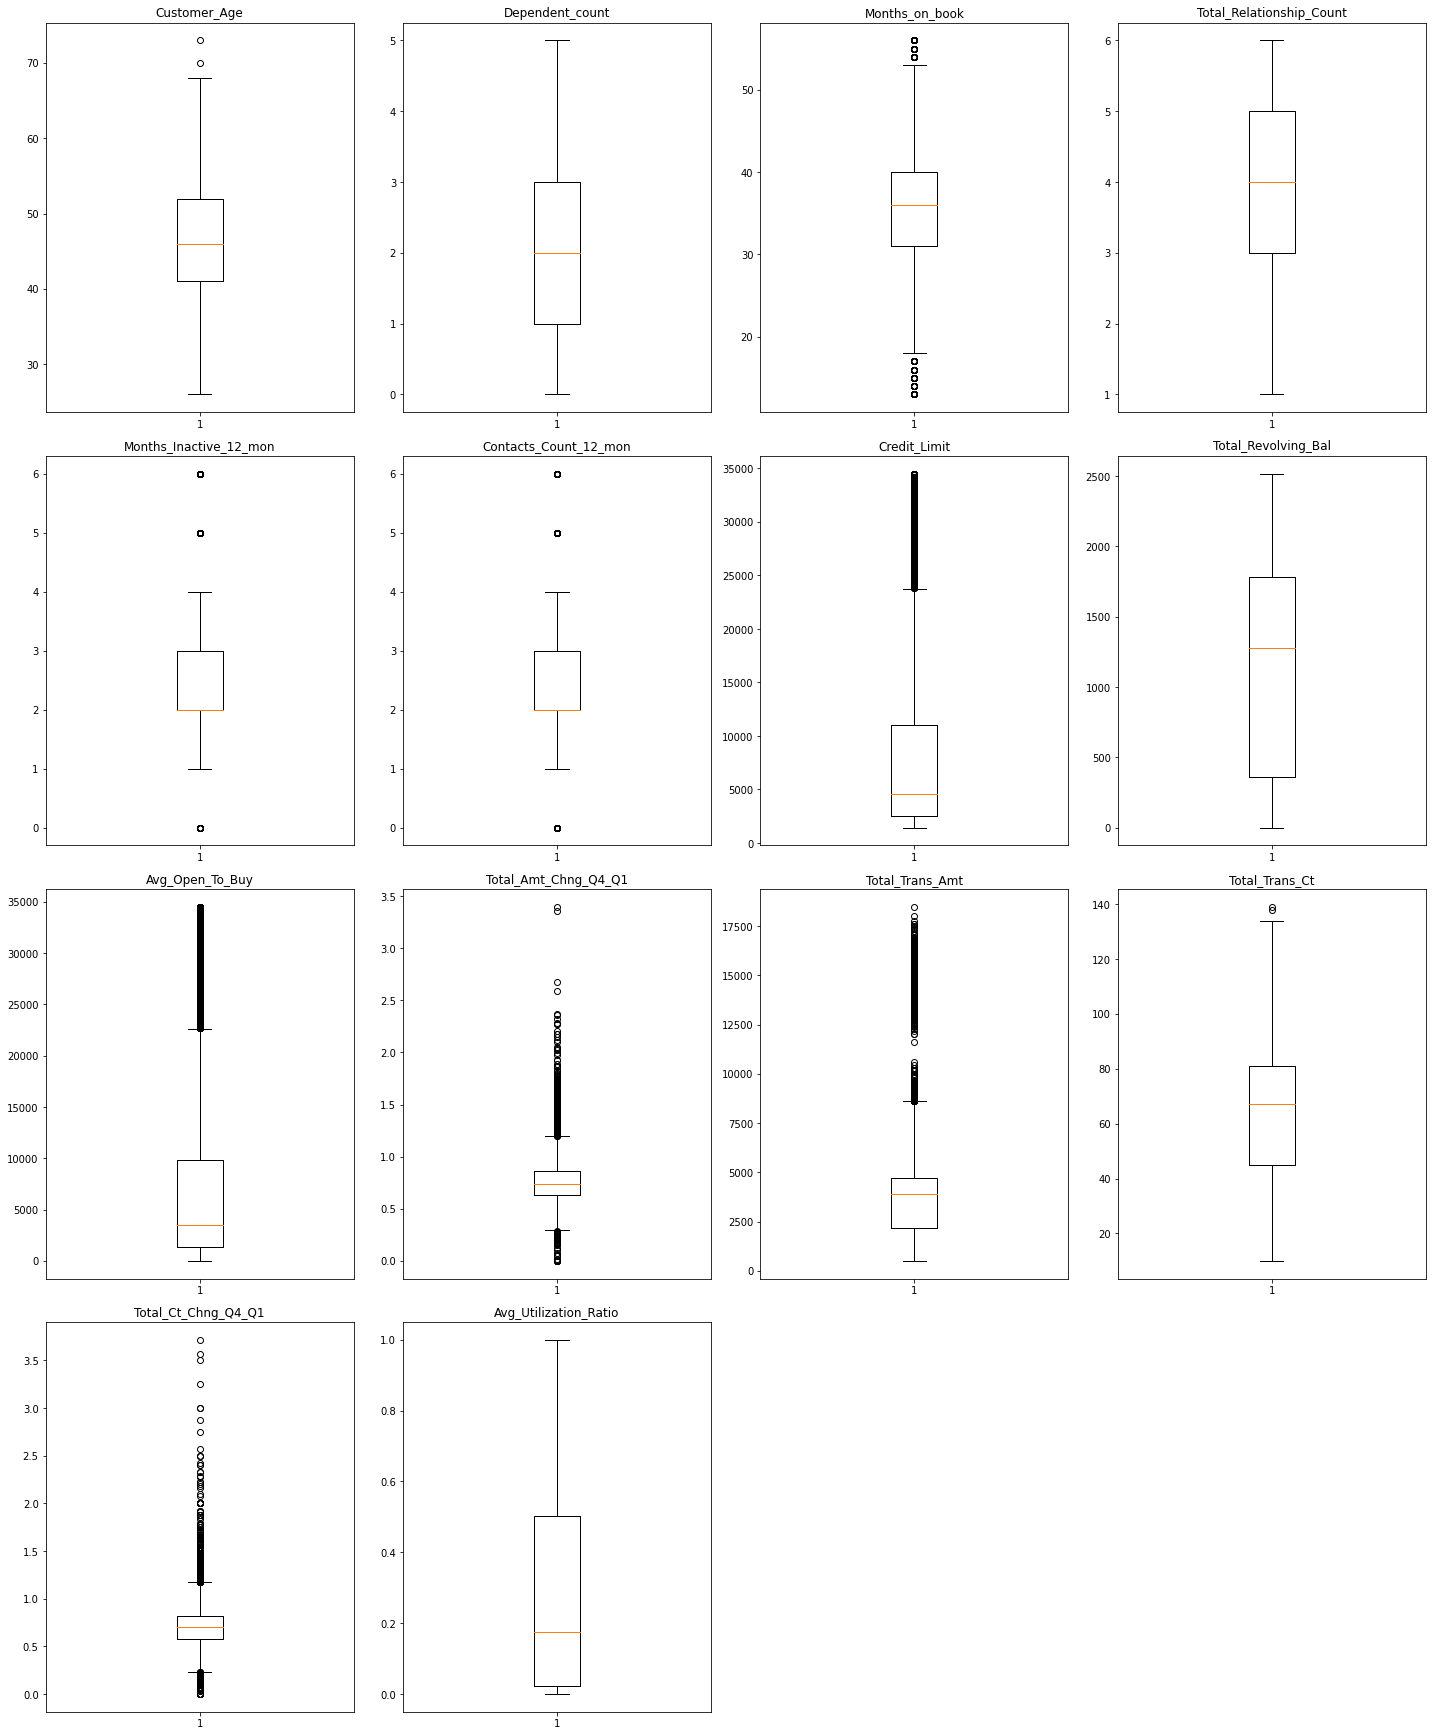

In [85]:
num_cols = data.select_dtypes(
    include=np.number
).columns.to_list()  # getting hte numerical columns
plt.figure(figsize=(20, 30))

for i, val in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[val], whis=1.5)  # plot box plot
    plt.tight_layout()
    plt.title(val)
plt.show()

#### Observations
1. Credit_limit : Has upper outliers
2. Avg_Open_To_Buy : Has upper outliers
3. Total_Amt_Chng_Q4_Q1:Has upper and lower outliers
4. Total_Trans_Amt : Has upper outliers
5. Total_Ct_Chng_Q4_Q1: Has upper and lower outliers

## Outlier Detection using the IQR method

### Credit_Limit Outlier Detection

In [86]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Credit_Limit"][data["Credit_Limit"].notnull()], [0.25, 0.75]
)
Credit_Limit_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Credit_Limit_4iqr}")
# getting the values
outlier_Credit_Limit_4iqr = data.loc[
    np.abs(data["Credit_Limit"] - data["Credit_Limit"].median()) > Credit_Limit_4iqr,
    "Credit_Limit",
]
outlier_Credit_Limit_4iqr.nunique()

Q1 = 2555.0, Q3 = 11067.5, 4*IQR = 34050.0


0

#### Observations
1. There are no observations beyond the 4* times IQR range for the Credit_Limit Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

### Avg_Open_To_Buy Outlier Detection

In [87]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Avg_Open_To_Buy"][data["Avg_Open_To_Buy"].notnull()], [0.25, 0.75]
)
Avg_Open_To_Buy_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Avg_Open_To_Buy_4iqr}")
# getting the values
outlier_Avg_Open_To_Buy_4iqr = data.loc[
    np.abs(data["Avg_Open_To_Buy"] - data["Avg_Open_To_Buy"].median())
    > Avg_Open_To_Buy_4iqr,
    "Avg_Open_To_Buy",
]
outlier_Avg_Open_To_Buy_4iqr.nunique()

Q1 = 1324.5, Q3 = 9859.0, 4*IQR = 34138.0


0

#### Observations
1. There are no observations beyond the 4* times IQR range for the Avg_Open_To_Buy Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

### Total_Trans_Amt Outlier Detection

In [88]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Total_Trans_Amt"][data["Total_Trans_Amt"].notnull()], [0.25, 0.75]
)
Total_Trans_Amt_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Trans_Amt_4iqr}")
# getting the values
outlier_Total_Trans_Amt_4iqr = data.loc[
    np.abs(data["Total_Trans_Amt"] - data["Total_Trans_Amt"].median())
    > Credit_Limit_4iqr,
    "Total_Trans_Amt",
]
outlier_Total_Trans_Amt_4iqr.nunique()

Q1 = 2155.5, Q3 = 4741.0, 4*IQR = 10342.0


0

#### Observations
1. There are no observations beyond the 4* times IQR range for the Total_Trans_Amt Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

### Total_Amt_Chng_Q4_Q1 Outlier Detection

In [89]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Total_Amt_Chng_Q4_Q1"][data["Total_Amt_Chng_Q4_Q1"].notnull()], [0.25, 0.75]
)
Total_Amt_Chng_Q4_Q1_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Amt_Chng_Q4_Q1_4iqr}")
# getting the values
outlier_Total_Amt_Chng_Q4_Q1_4iqr = data.loc[
    np.abs(data["Total_Amt_Chng_Q4_Q1"] - data["Total_Amt_Chng_Q4_Q1"].median())
    > Credit_Limit_4iqr,
    "Total_Amt_Chng_Q4_Q1",
]
outlier_Total_Amt_Chng_Q4_Q1_4iqr.nunique()

Q1 = 0.631, Q3 = 0.859, 4*IQR = 0.9119999999999999


0

#### Observations
1. There are no observations beyond the 4* times IQR range for the Total_Amt_Chng_Q4_Q1 Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

### Total_Ct_Chng_Q4_Q1 Outlier Detection

In [91]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Total_Ct_Chng_Q4_Q1"][data["Total_Ct_Chng_Q4_Q1"].notnull()], [0.25, 0.75]
)
Total_Ct_Chng_Q4_Q1_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Ct_Chng_Q4_Q1_4iqr}")
# getting the values
outlier_Total_Ct_Chng_Q4_Q1_4iqr = data.loc[
    np.abs(data["Total_Ct_Chng_Q4_Q1"] - data["Total_Ct_Chng_Q4_Q1"].median())
    > Total_Ct_Chng_Q4_Q1_4iqr,
    "Total_Ct_Chng_Q4_Q1",
]
outlier_Total_Ct_Chng_Q4_Q1_4iqr.nunique()

Q1 = 0.582, Q3 = 0.818, 4*IQR = 0.944


37

#### Observations
1. There are only 37 observations beyond the 4* times IQR range for the Total_Ct_Chng_Q4_Q1 Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

## tmean Outlier Check

### Credit_Limit tmean outlier check

In [92]:
Credit_Limit = data["Credit_Limit"][data["Credit_Limit"].notnull()]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Credit_Limit, limits=np.quantile(Credit_Limit, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Credit_Limit, limits=[0, 15000]))

6683.022463589237
4901.840281452971


#### Observations
1. There is no significant change in the tmean for both the analysis in Credit_Limit column.
2. Hence we will not remove the outliers. They hold valuable informations.

### Avg_Open_To_Buy tmean outlier check

In [93]:
Avg_Open_To_Buy = data["Avg_Open_To_Buy"][data["Avg_Open_To_Buy"].notnull()]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Avg_Open_To_Buy, limits=np.quantile(Avg_Open_To_Buy, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Avg_Open_To_Buy, limits=[0, 15000]))

5512.904924709948
3913.223062359484


#### Observations
1. There is no significant change in the tmean for both the analysis in Avg_Open_To_Buy column.
2. Hence we will not remove the outliers. They hold valuable informations.

### Total_Trans_Amt tmean outlier check

In [31]:
Total_Trans_Amt = data["Total_Trans_Amt"][data["Total_Trans_Amt"].notnull()]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Total_Trans_Amt, limits=np.quantile(Total_Trans_Amt, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Total_Trans_Amt, limits=[0, 15000]))

3706.816016781836
4075.017679333469


#### Observations
1. There is no significant change in the tmean for both the analysis in Total_Trans_Amt  column.
2. Hence we will not remove the outliers. They hold valuable informations.

### Total_Amt_Chng_Q4_Q1 tmean outlier check

In [32]:
Total_Amt_Chng_Q4_Q1 = data["Total_Amt_Chng_Q4_Q1"][
    data["Total_Amt_Chng_Q4_Q1"].notnull()
]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Total_Amt_Chng_Q4_Q1, limits=np.quantile(Total_Amt_Chng_Q4_Q1, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Total_Amt_Chng_Q4_Q1, limits=[0, 3.5]))

0.7443713298791019
0.7599406536980349


#### Observations
1. There is only a very small change in the tmean for both the analysis in Total_Amt_Chng_Q4_Q1 column.
2. Hence we will not remove the outliers. They hold valuable informations.


### Total_Ct_Chng_Q4_Q1 tmean outlier check

In [33]:
Total_Ct_Chng_Q4_Q1 = data["Total_Ct_Chng_Q4_Q1"][data["Total_Ct_Chng_Q4_Q1"].notnull()]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Total_Ct_Chng_Q4_Q1, limits=np.quantile(Total_Ct_Chng_Q4_Q1, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Total_Ct_Chng_Q4_Q1, limits=[0, 3.5]))

0.7002042851865534
0.7116435555555556


#### Observations
1. There is only a very small change in the tmean for both the analysis in Total_Ct_Chng_Q4_Q1 column.
2. Hence we will not remove the outliers. They hold valuable informations.

## EDA 
## Univariate Analysis - Numerical Columns

In [34]:
def hist_box(data, feature, bins=None, figsize=(12, 7), kde=False):
    """
    Boxplot and histogram in one figure

    data: dataframe
    feature: column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # subplot with 2 rows
        sharex=True,  # x-axis is shared with both the plots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, color="yellow", showmeans=True
    )  # boxplot with star in the mean value
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, color="tomato", bins=bins, kde=kde
    ) if bins else sns.histplot(
        data=data, x=feature, ax=ax_hist2, color="tomato", kde=kde
    )  # histogram

    ax_hist2.axvline(
        data[feature].mean(), linestyle="--", color="green"
    )  # adding mean to histogram
    ax_hist2.axvline(
        data[feature].median(), linestyle="--", color="hotpink"
    )  # adding median to histogram

### Customer_Age

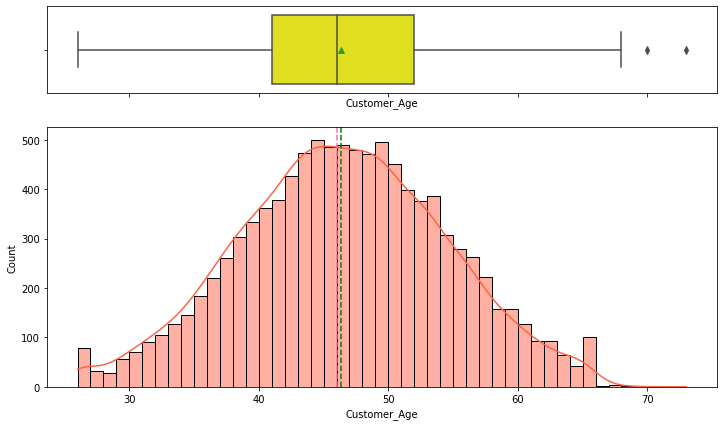

In [35]:
hist_box(data, "Customer_Age", kde=True)

#### Observations
1. The distribution of Age is normal with a mean of 46.
2. There are outliers present.
3. The boxplot shows that the 3rd quartile is about 52 which means that about 75% of the customers are less than age 52.

### Months_on_book

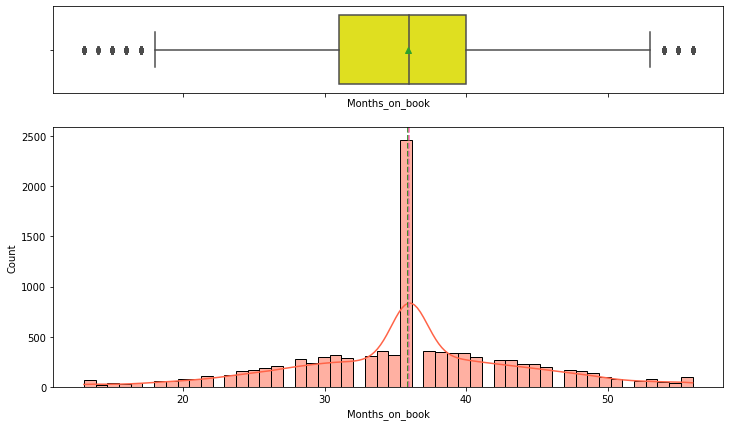

In [36]:
hist_box(data, "Months_on_book", kde=True)

#### Observations
1. The distribution of Months_on_book is almost normal with a mean of 36 months.
2. There are outliers present on both sides.
3. The boxplot shows that the 3rd quartile is about 40 months which means that about 75% of the customers have Months_on_book value   less than 40.

###  Credit_Limit

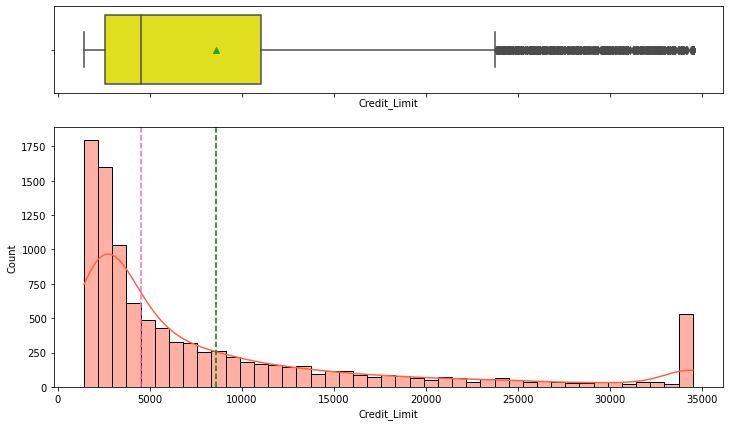

In [37]:
hist_box(data, "Credit_Limit", kde=True)

#### Observations
1. The distribution of Credit_Limit is right skewed with a mean of 36 months.
3. there is an extreme value of 35000.
2. There are many outliers present.
3. The boxplot shows that the 3rd quartile is about 11067.5 which means that about 75% of the customers have Credit_Limit value less than 11067.5

### Total_Revolving_Bal

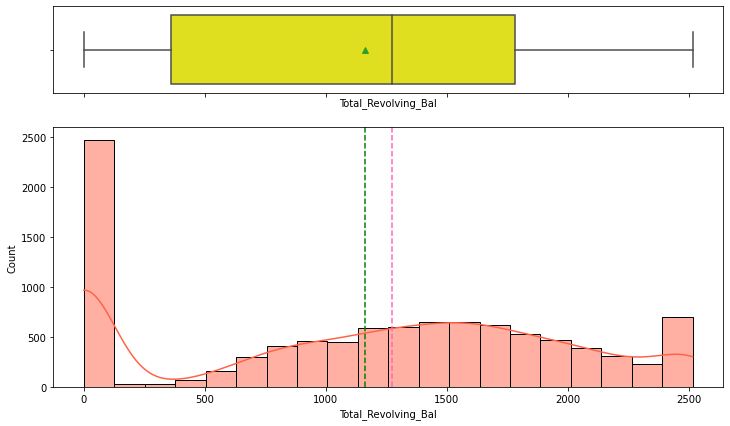

In [38]:
hist_box(data, "Total_Revolving_Bal", kde=True)

#### Observations

1. There are much values with **0**. A value of zero Total_Revolving_Bal is possible.
2. From the boxplot, we can see that the third quartile (Q3) is equal to 1784 dollars, which means 75% of customers have less than 1784 dollars of Total_Revolving_Bal  and an average skin thickness of 1162.8 dollars.

### Total_Trans_Amt

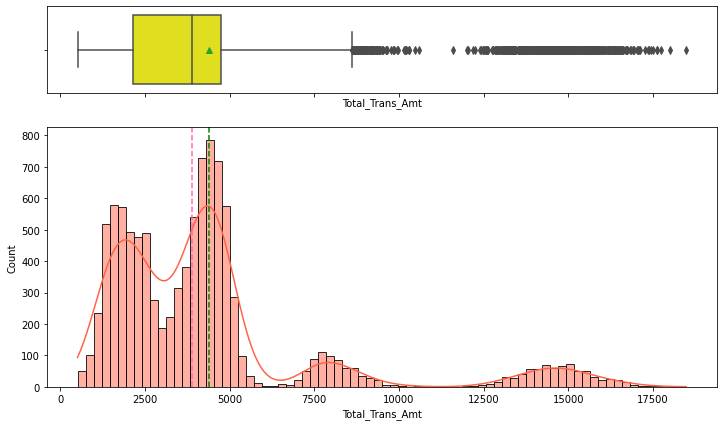

In [39]:
hist_box(data, "Total_Trans_Amt", kde=True)

#### Observations
1. The distribution of Total_Trans_Amt is right skewed with a mean of 4404 dollars.
2. There are many outliers present.
3. The boxplot shows that the 3rd quartile is about 4741 which means that about 75% of the customers have Total_Trans_Amt value less than 4741

###  Total_Trans_Ct

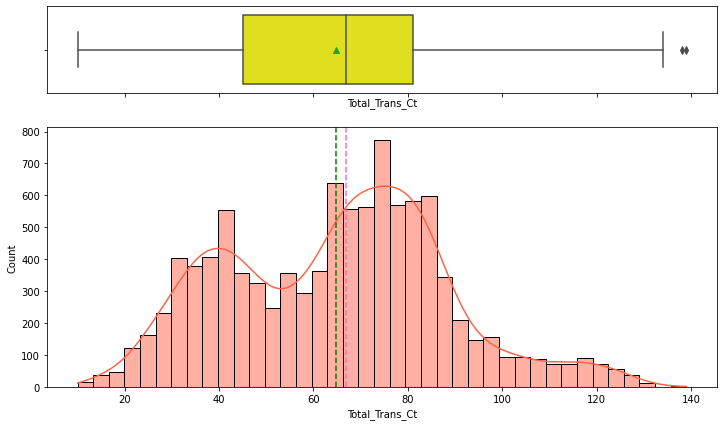

In [40]:
hist_box(data, "Total_Trans_Ct", kde=True)

#### Observations
1. The distribution of Total_Trans_Ct is almost normal with a mean of 65 months.
2. There are  outliers present.
3. The boxplot shows that the 3rd quartile is about 81 which means that about 75% of the customers have Total_Trans_Ct value less than 81.

### Avg_Open_To_Buy

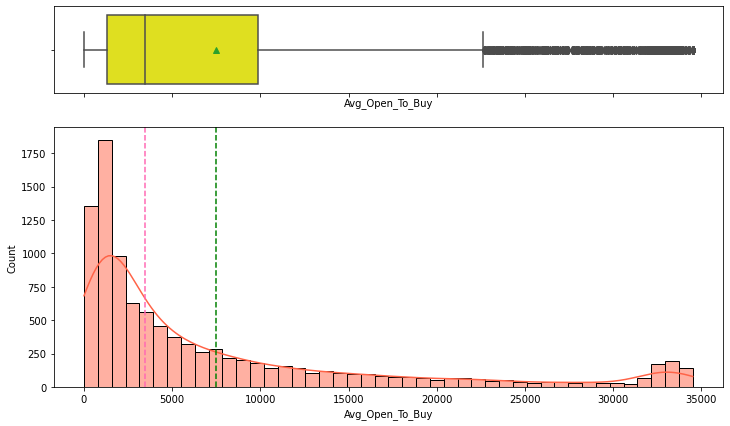

In [41]:
hist_box(data, "Avg_Open_To_Buy", kde=True)

#### Observations
1. There are 0 values in this columns. Hvaing a 0 dollars Avg_Open_To_Buy is possible.
2. The distribution of Avg_Open_To_Buy is right skewed with a mean of 7469 dollars.
3. There are many outliers present.
4. The boxplot shows that the 3rd quartile is about 9859 dollars which means that about 75% of the customers have Avg_Open_To_Buy value less than 9859 dollars

### Avg_Utilization_Ratio

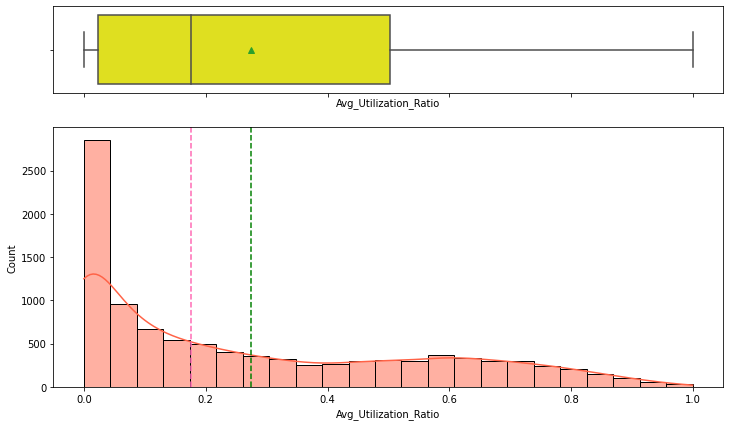

In [42]:
hist_box(data, "Avg_Utilization_Ratio", kde=True)

#### Observations
1. The distribution of Avg_Utilization_Ratio is right skewed with a mean of 0.27 
2. There are no outliers.
3. The boxplot shows that the 3rd quartile is about 0.53 which means that about 75% of the customers have Avg_Utilization_Ratio value less than  0.53

### Total_Amt_Chng_Q4_Q1

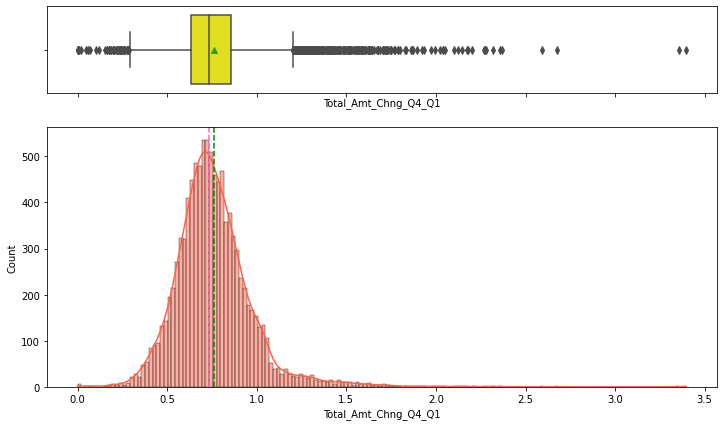

In [43]:
hist_box(data, "Total_Amt_Chng_Q4_Q1", kde=True)

#### Observations
1. The distribution of Total_Amt_Chng_Q4_Q1 is almost normal with a mean ratio of 0.760 
2. There are many outliers present on both sides.
3. The boxplot shows that the 3rd quartile is about 0.8 which means that about 75% of the customers have Total_Amt_Chng_Q4_Q1 value less than 0.8

### Total_Ct_Chng_Q4_Q1

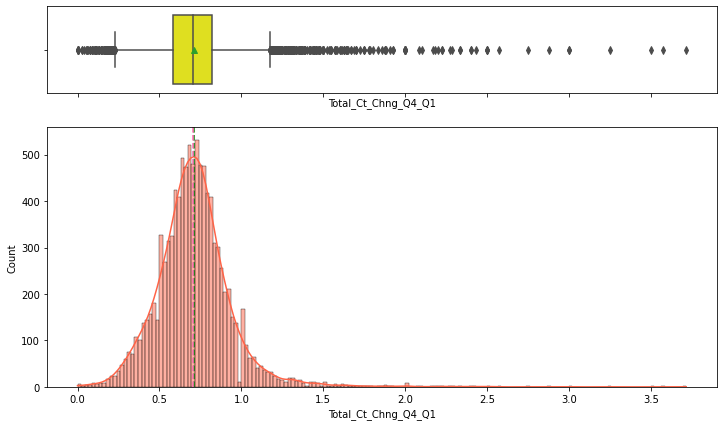

In [44]:
hist_box(data, "Total_Ct_Chng_Q4_Q1", kde=True)

#### Observations
1. The distribution of Total_Ct_Chng_Q4_Q1 is almost normal with a mean ratio of 0.712 
2. There are many outliers present on both sides.
3. The boxplot shows that the 3rd quartile is about 0.81 which means that about 75% of the customers have Total_Ct_Chng_Q4_Q1 value less than 0.81

## Univariate ANalysis - Categorical Variables

In [45]:
# function to create labeled barplots
def labelled_barplot(data, feature, perc=False, n=None):
    """Barplot with percentage at the top

    data: dataframe
    feature:  column
    perc:  to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)"""

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 6))
    else:
        plt.figure(figsize=(n + 1, 6))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
        palette="Paired",
    )

    for p in ax.patches:
        if perc == True:
            labels = "{:.1f}%".format(
                p.get_height() * 100 / total
            )  # percentage of each class of the category
        else:
            labels = p.get_height()

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            labels,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate

    plt.show()  # show the plot

### Attrition_Flag

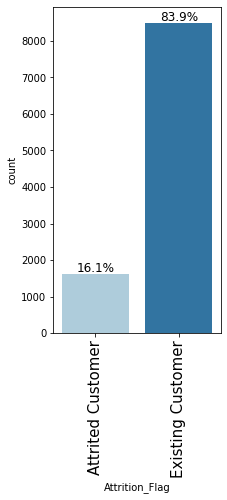

In [46]:
labelled_barplot(data, "Attrition_Flag", perc=True)

#### Observations
1. 83.9% of the customers are Existing customers.

### Dependent_count

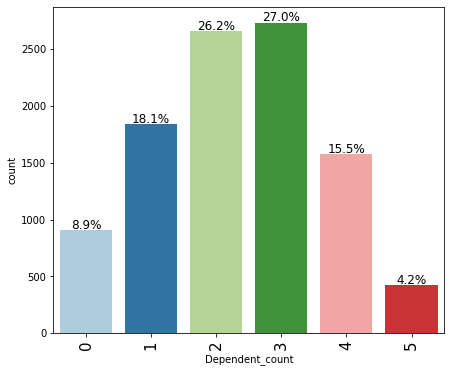

In [47]:
labelled_barplot(data, "Dependent_count", perc=True)

#### Observations
1. 53.2% of the customers have either 2 or 3 dependants.
2. 18.1 % of customers have 1 dependant.
3. 15.5% have 4 dependents

### Gender

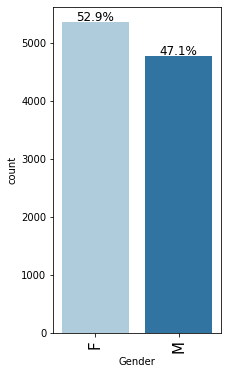

In [48]:
labelled_barplot(data, "Gender", perc=True)

#### Observations
1. 52.9% of the customers are females
2. 47.1 % of customers are male

### Education_Level

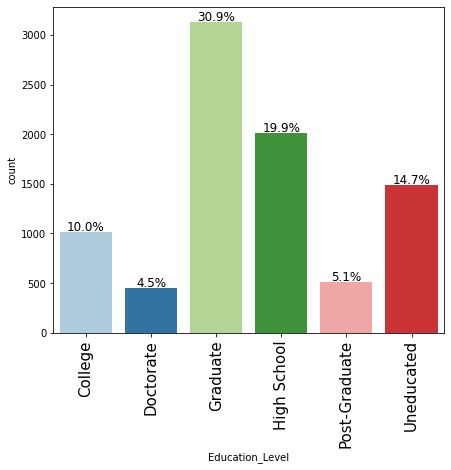

In [49]:
labelled_barplot(data, "Education_Level", perc=True)

#### Observations
1. 30.9% of the customers are graduates.
2. 19.9 % of customers are done high school.
3. 14.7% of customers are uneducated.
4. 5.1% are post graduates
5. 4.5% are docrate holders

#### The percentage dont add up to 100 because of missing values

### Marital_Status

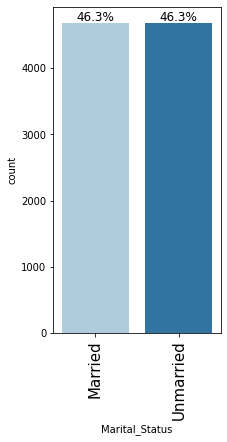

In [50]:
labelled_barplot(data, "Marital_Status", perc=True)

#### Observations
1. 46.3% are married and 46.3% are unmarried.
#### The percentage dont add up to 100 because of missing values

### Income_Category

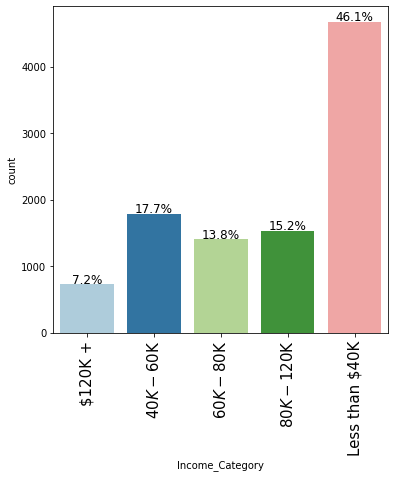

In [51]:
labelled_barplot(data, "Income_Category", perc=True)

#### Observations
1. 46.1% of customers have income Less than 40k.
2. 17.7% of customers are in income range of 40-60k.
3. 13.8% of customers are in income range of 60-80k.
4. 15.2% of customers are in income range of 80-120k.
5. 7.2%  of customers are in income range above 120k

### Total_Relationship_Count

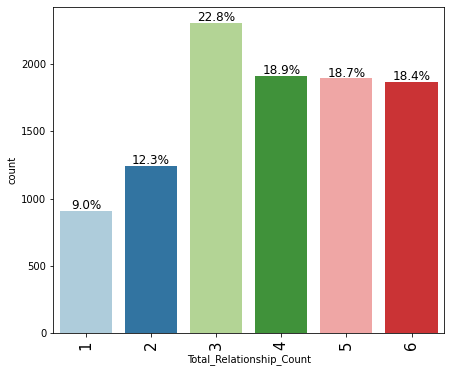

In [52]:
labelled_barplot(data, "Total_Relationship_Count", perc=True)

#### Observations
1. 22.8% of customers hold 3 products.
2. 18.9% hold 4 products followed by 18.7% holds 5 products and 18.4% holds 6 products.
3. 12.3% hold 2 products.
4. 9% hold 1 product

### Months_Inactive_12_mon

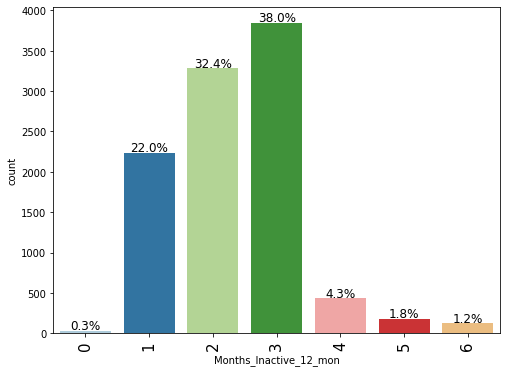

In [53]:
labelled_barplot(data, "Months_Inactive_12_mon", perc=True)

#### Observations
1. 38% of customers are inactive for 3 months in the last 12 months.
2. 32.4% of customers are inactive for 2 months in the last 12 months.
3. 22% of customers are inactive for 1 month in the last 12 months.
4. 4.3% of customers are inactive for 4 months ollowed by 1.8% inactive for 5 months and 1.2% inactive for 6 months
5. only 0.3% were active all the months

### Contacts_Count_12_mon

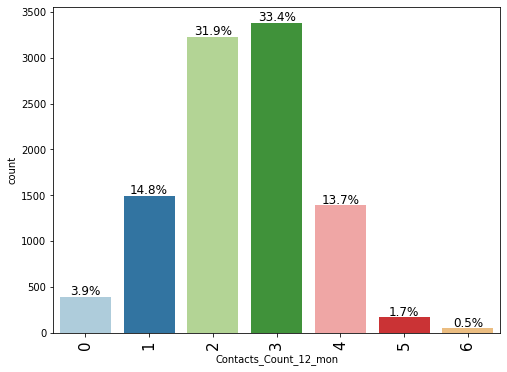

In [54]:
labelled_barplot(data, "Contacts_Count_12_mon", perc=True)

#### Observations
1. 33.4% of customers have contacted the bank 3 times in the last 12 months.
2. 31.9% of customers have contacted the bank 2 times in the last 12 months.
3. 14.8% of customers have contacted the bank once in the last 12 months, 13.7% have contacted 4 times,1.7% 5 times nad 0.5% 6 times

### Card_Category

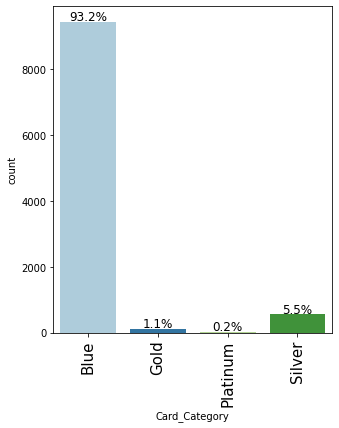

In [55]:
labelled_barplot(data, "Card_Category", perc=True)

#### Observations
1. 93.2% of customers have the blue card_category followed by 5.5% with Silver category.
2. 1.1% have the Cold Card_category anf only 0.2% have the Platinum Card_Category

## Encoding Attrition Flag 

In [94]:
# Encoding the target variable
data["Attrition_Flag"] = data["Attrition_Flag"].apply(
    lambda x: 1 if x == "Attrited Customer" else 0
)

## Bivariate Analysis 

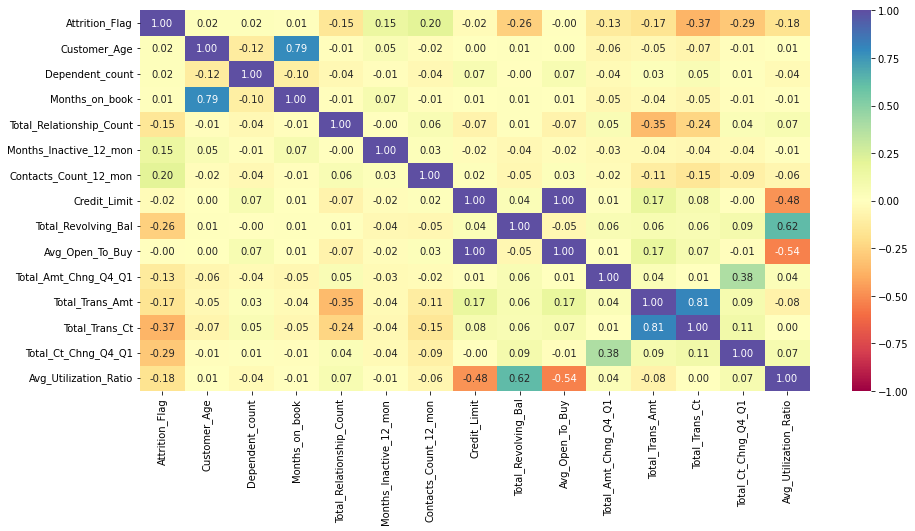

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations

#### Positive Correlation
1. Customer Age and Months_oon_Book have a high positive correlation of value 0.79.
2. Total_Trans_Amt and Total_Trans_Ct are highly positively correlated with value 0.81.
3. Avg_Utilization_Ratio and Total_Revolving_Balance  are positively correlated with value 0.62

#### Negative Correlation
1. Avg_Utilization_Ratio and Avg_Open_to_buy are negatively correlated with value -0.54
2. Avg_Utilization_Ratio and Credit_Limit are  negatively correlated with value -0.48

#### Other correlations are not strong either with the target or between any independant variables.

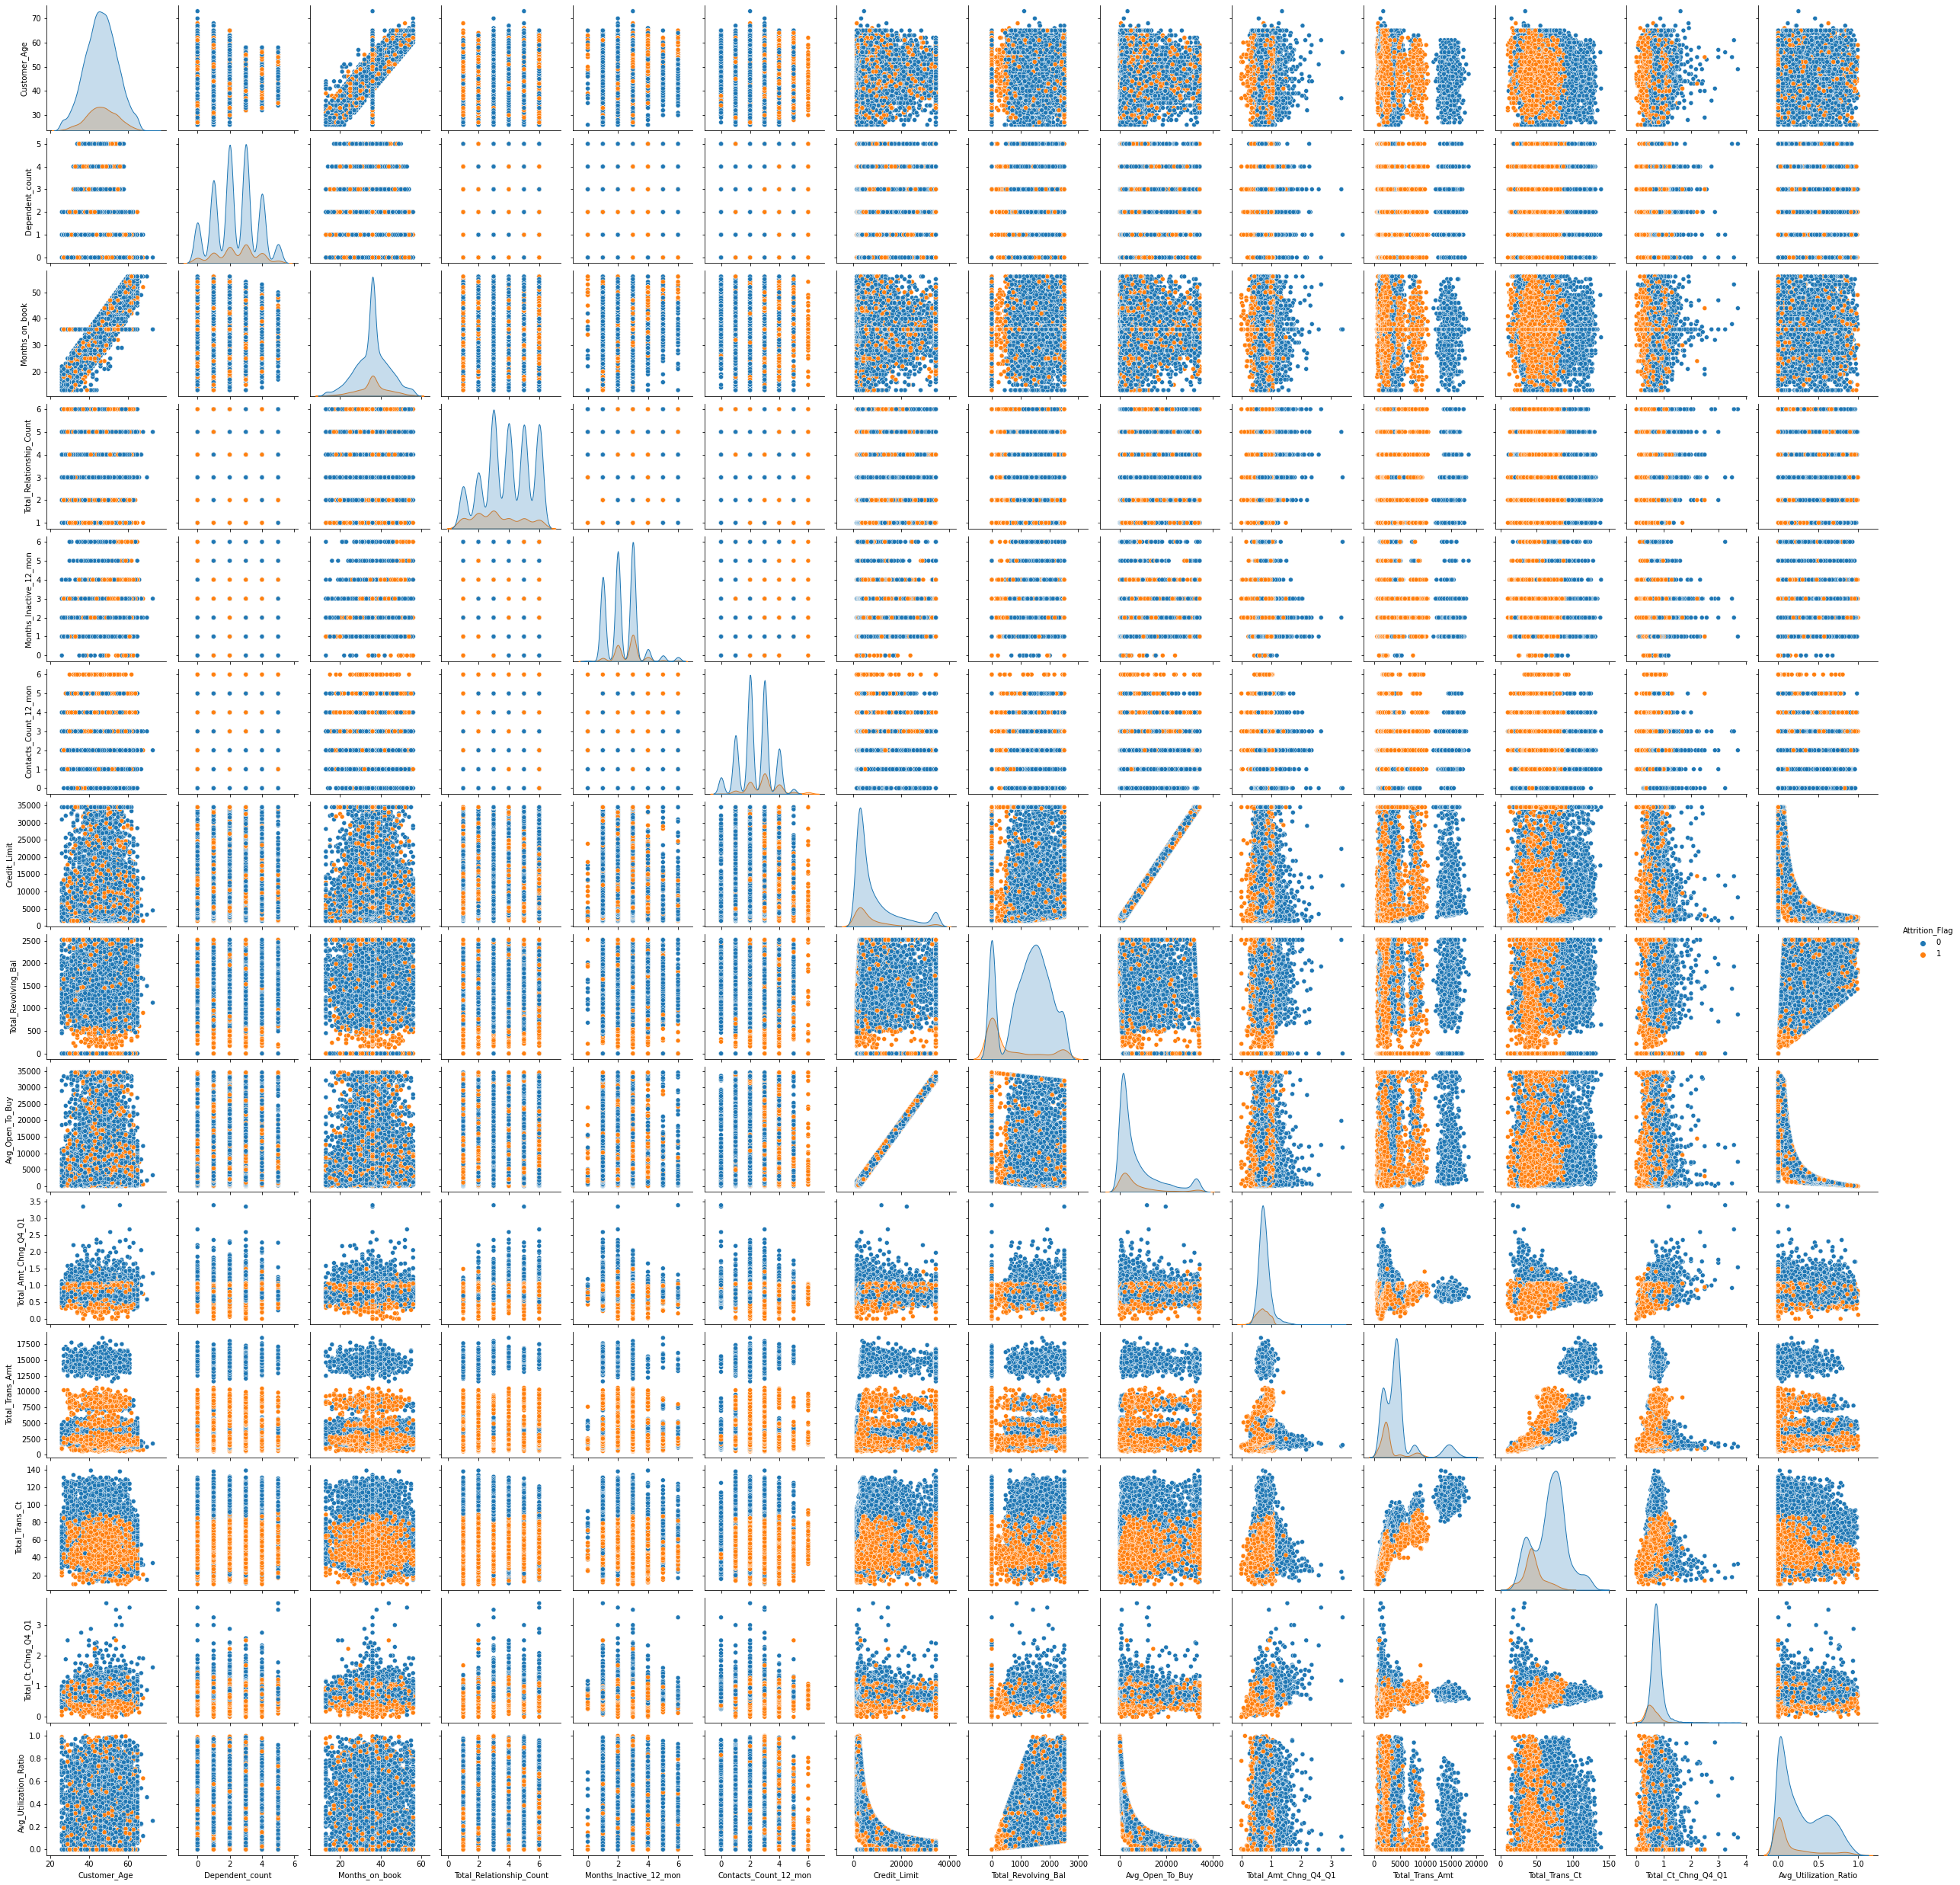

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data, diag_kind="kde", hue="Attrition_Flag")

#### Observations
1. There are overlaps i.e. no clear distinction in the distribution of variables for customers who are existing and who are atrrited.
2. Let's explore this further with the help of other plots.

## Mutivariate Analysis - Target with Numerical variables

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


<IPython.core.display.Javascript object>

### "Credit_Limit" vs "Attrition_Flag"

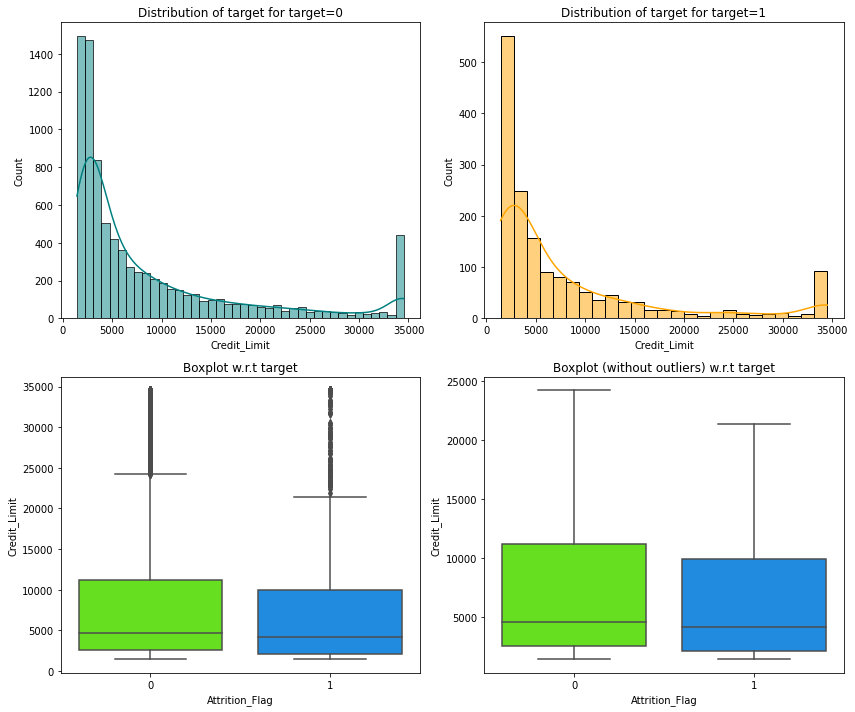

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

#### Observations
1. We can see that the Credit_Limit's second and third quartile of attrition customers is lesser than the second and third quartile of existing customers.
2. This shows that customers with very low Credit_Limit are more likely to show attrition.

### "Months_on_book" vs "Attrition_Flag"

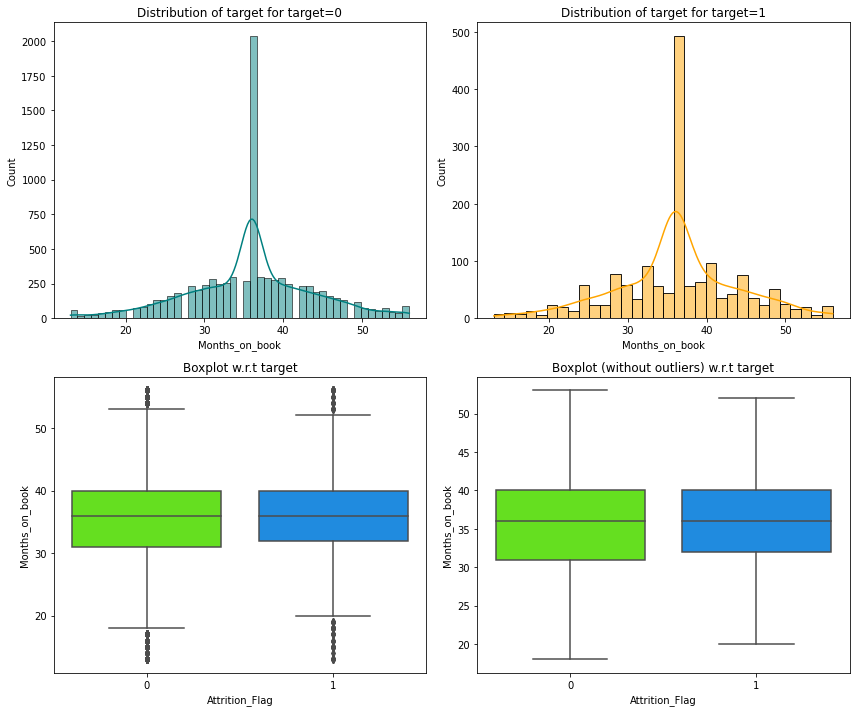

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

#### Observations
1. There is no difference in Months_on_book of attriting and non-attriting customers.

### "Total_Revolving_Bal" vs "Attrition_Flag"

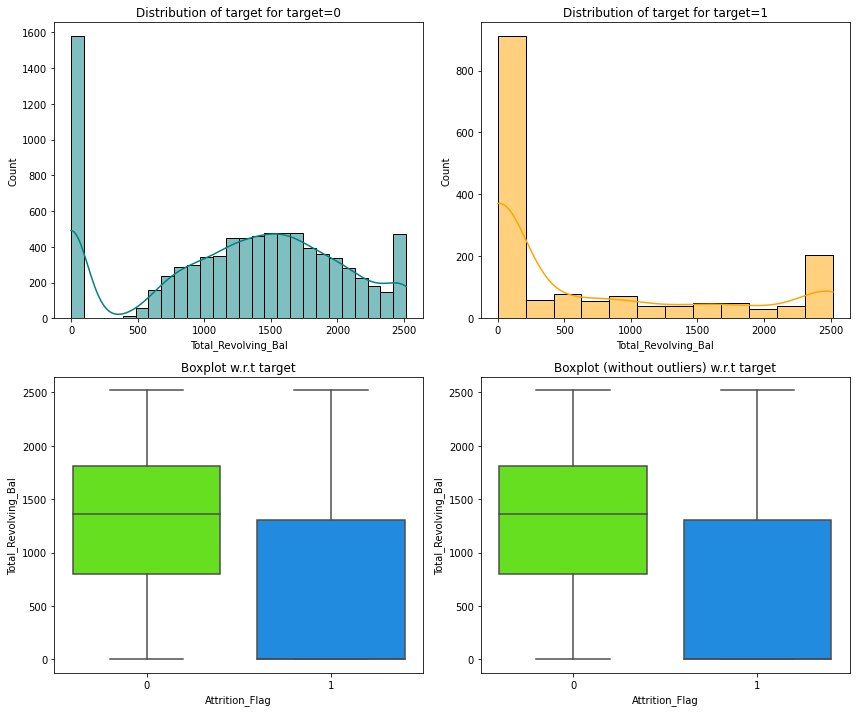

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#### Observations
1. We can see that the Total_Revolving_Bal's third quartile of attrition customers is  lesser than the second and  third quartile of existing customers.
2. This shows that customers with very low Total_Revolving_Bal are more likely to show attrition.

###  "Avg_Open_To_Buy" vs "Attrition_Flag"

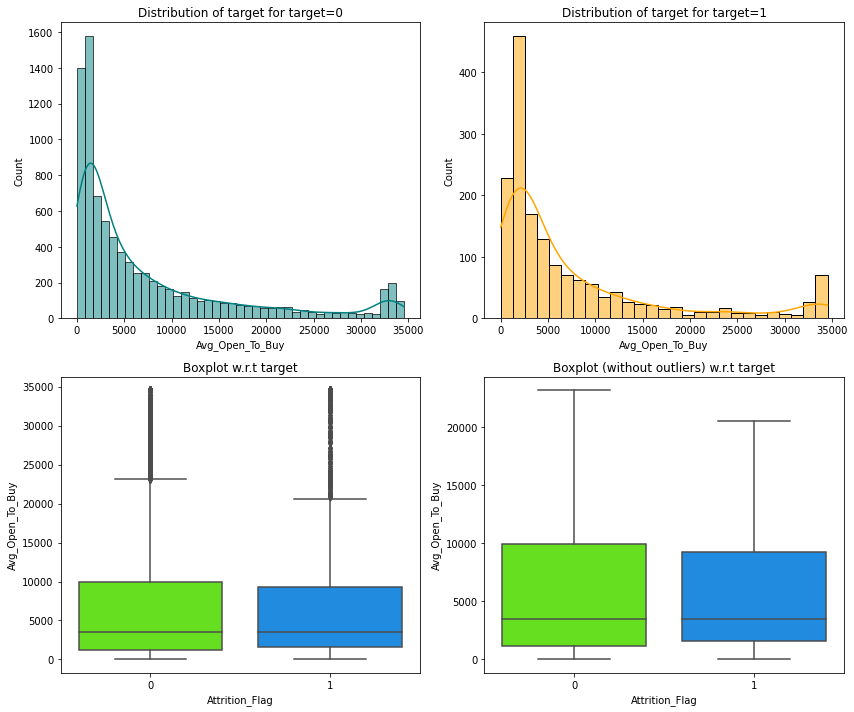

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

#### Observations
1. There is no difference in Avg_Open_To_Buy of attriting and non-attriting customers.


### "Avg_Utilization_Ratio" vs "Attrition_Flag"

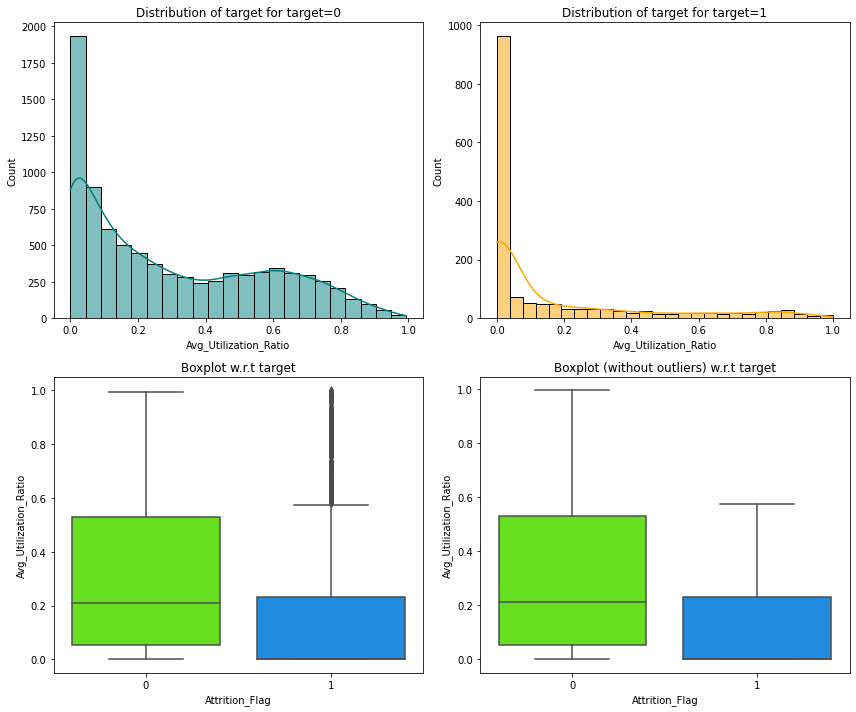

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

#### Observations
1. We can see that the Avg_Utilization_Ratio's  third quartile of attrition customers is very less than the third quartile of existing customers.
2. This shows that customers with very low Avg_Utilization_Ratio  are more likely to show attrition.

### "Total_Trans_Amt" vs "Attrition_Flag"

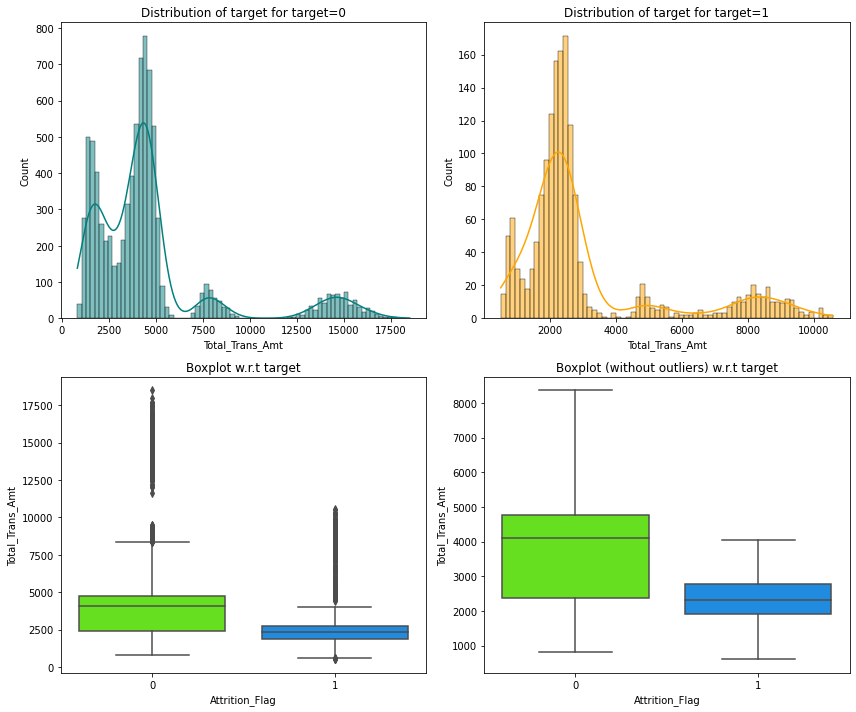

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

#### Observations
1. We can see that the Total_Trans_Amt's second and third quartile of attrition customers is very less than the  second and third quartile of existing customers.
2. This shows that customers with very low Total_Trans_Amt  in the last 12 months are more likely to show attrition

### "Total_Trans_Ct" vs "Attrition_Flag"

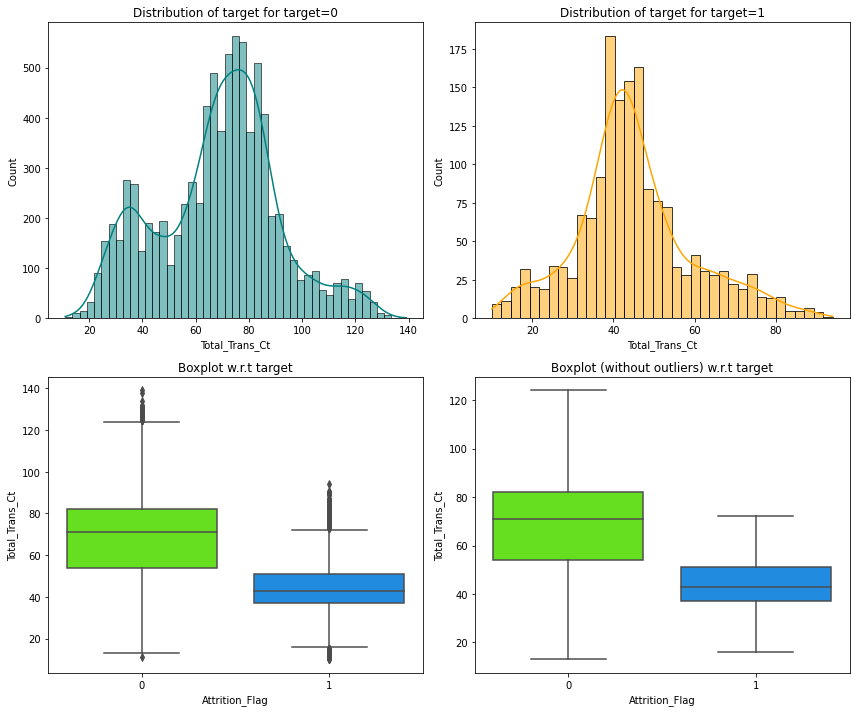

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

#### Observations
1. We can see that the second and third quartile  of attrition customers is very less than the first, second and third quartile  of existing customers.
2. This shows that customers with very low Total_Trans_Ct in the last 12 months are more likely to show attrition

### "Total_Amt_Chng_Q4_Q1" vs "Attrition_Flag"

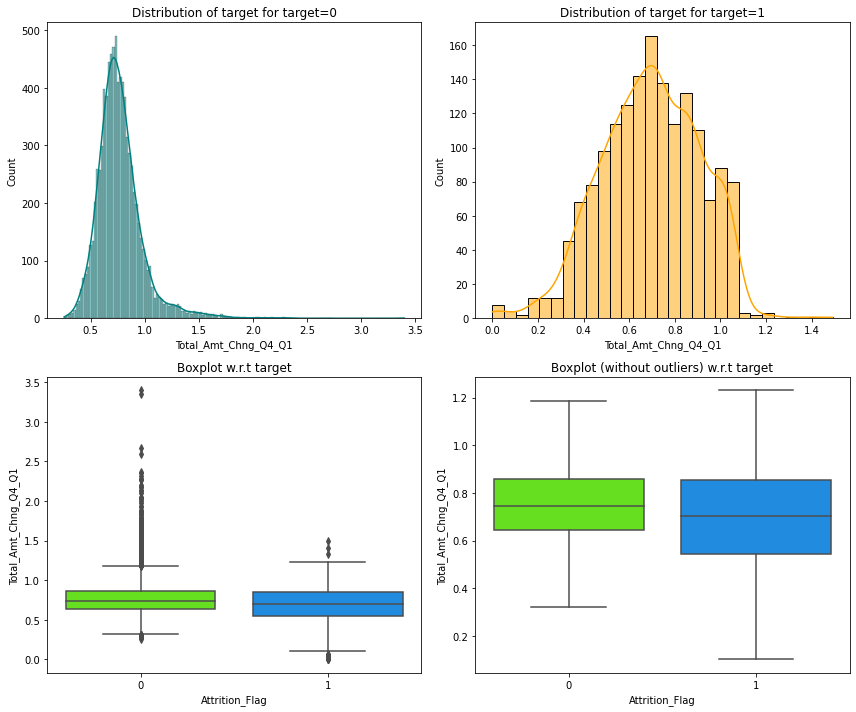

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

#### Observations
1. We can see that the median Total_Amt_Chng_Q4_Q1 of attrition customers is less than median Total_Amt_Chng_Q4_Q1 of existing customers.
2. this shows that customers with LOWER Ratio of  total transaction amount in 4th quarter and the total transaction amount in 1st quarter are more likely to show attrition

### "Total_Ct_Chng_Q4_Q1" vs "Attrition_Flag"

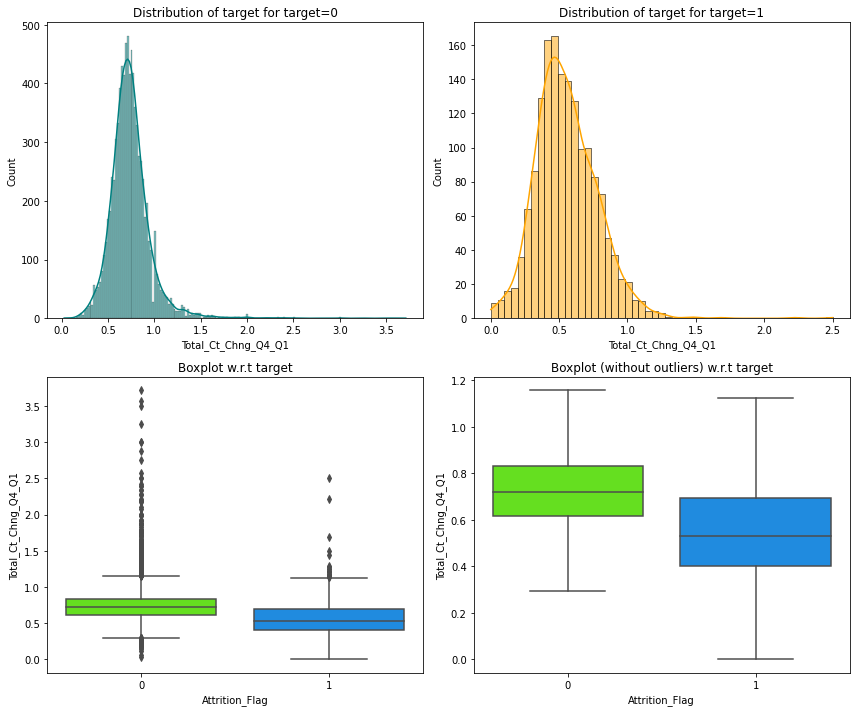

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#### Observations

1.We can see that the second and third quartile of customers who show attrition are much less than the second and third quartile of non-attrition customers.
2. This shows that the customers with LOWER Ratio of  total transaction count in 4th quarter and the total transaction count in 1st quarter are more likely to show attrition.

### "Customer_Age" vs "Attrition_Flag"

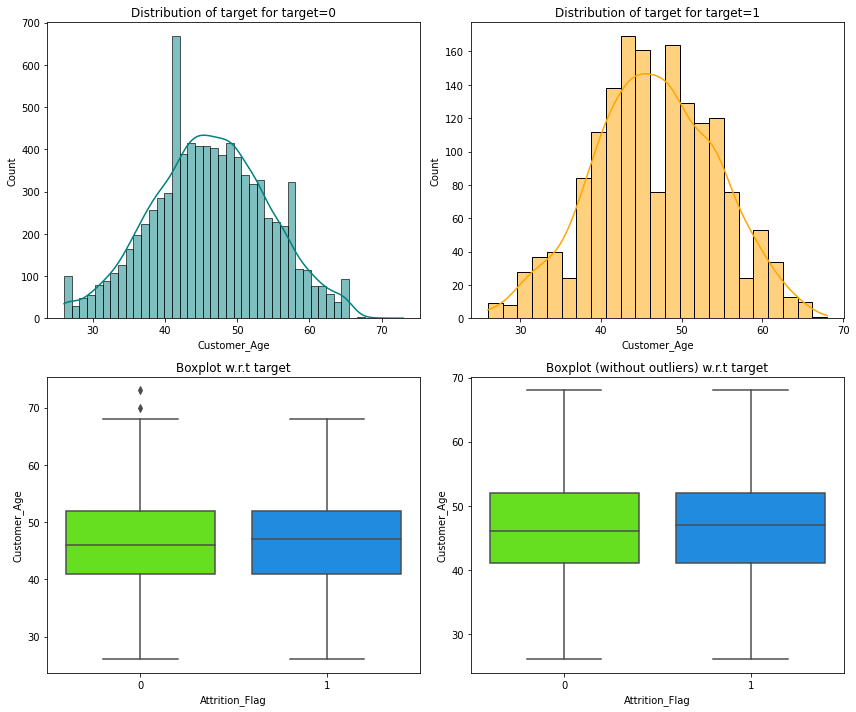

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

#### Observations

1. Customers with median age of about  49 show more attrition This shows that customers with a higher can show more attrition than young customerss


## Mutivariate Analysis - Target with Categorical variables

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )# crosstab
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))# stacked bar plot
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()# show the plot

<IPython.core.display.Javascript object>

### Dependent_count"  vs "Attrition_Flag"

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


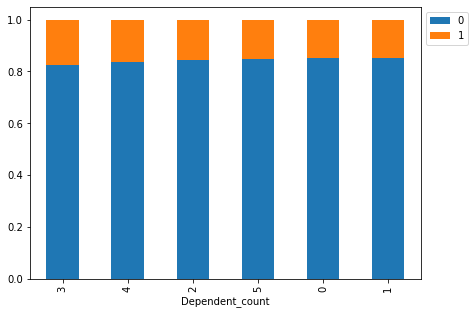

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

#### Observations
1. There is no significant difference concerning the Dependent_count
2. However,  customers with 3 dependants are more likely to show attrition  as compared to other  customers with other dependants .

### "Gender"  vs "Attrition_Flag"

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


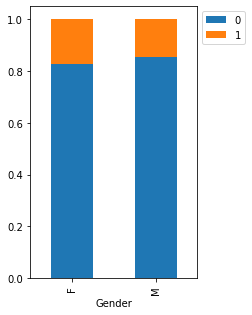

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

#### Observations
1. Females are more likely to show attrition than male customers

### "Education_Level"  vs "Attrition_Flag"

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


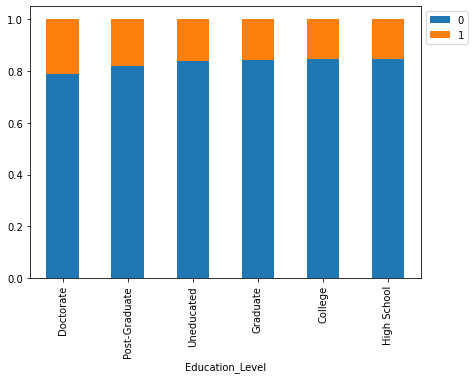

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

#### Observations
1. Doctorate holders are more likely to show attrition followed by post-graduates than other customers.
2. This may be because they are well educated and aware that credit cards will make people in debt and liable to the bank

### "Marital_Status"  vs "Attrition_Flag"

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Unmarried       3902   789  4691
Married         3978   709  4687
------------------------------------------------------------------------------------------------------------------------


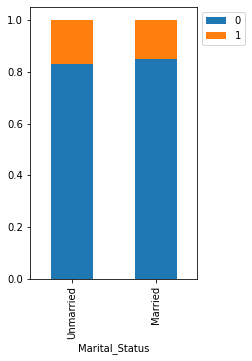

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

#### Observations
1. Unmarried customers show more attrition than married customers
2. This may be because their needs are lesser.

### "Income_Category"  vs "Attrition_Flag"

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   3874   799   4673
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


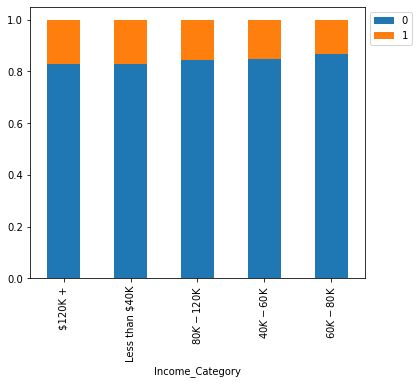

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

#### Observations
1. Customers with 120k+ dollars are more likely to show attrition followed by customers with less than 40k dollars.

### "Card_Category"  vs "Attrition_Flag"

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


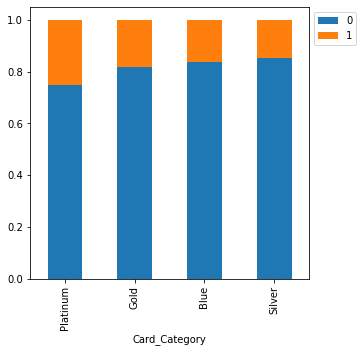

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

#### Observations
1. Customers with Platinum Card_category are more likely to show attrition followed by customers with Gold card_category.

### "Total_Relationship_Count"  vs "Attrition_Flag"

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


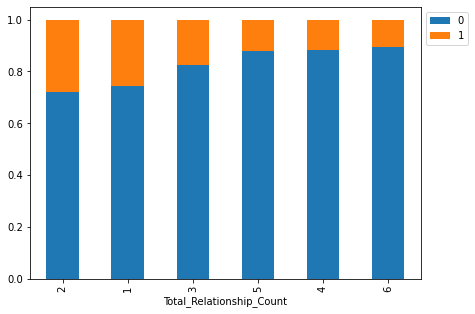

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

#### Observations
1. Customers with 2  products held by them  are more likely to show highest attrition followed by customers with 1  products held by them.

### "Months_Inactive_12_mon" vs "Attrition_Flag"

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


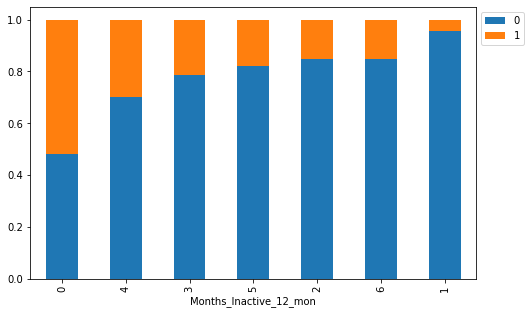

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

#### Observations
1. Customers who show high activness show highest attrition followed by customers with 4 months of inactiveness show attrition.

### "Contacts_Count_12_mon" vs "Attrition_Flag"

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


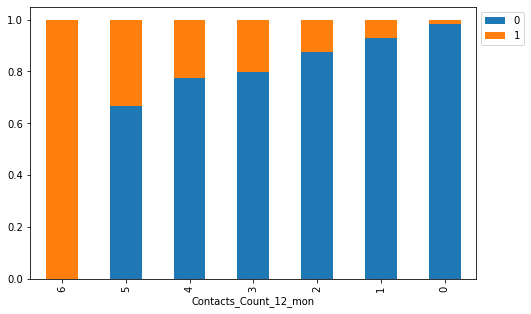

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

#### Observations
1. Customers who have contacted the back for 6 times show highest attrition followed by customers who contacted the bank 5 times.

# Business Questions

### How Card_Category varies with Total_trans_Amt accross Attrition_Flag

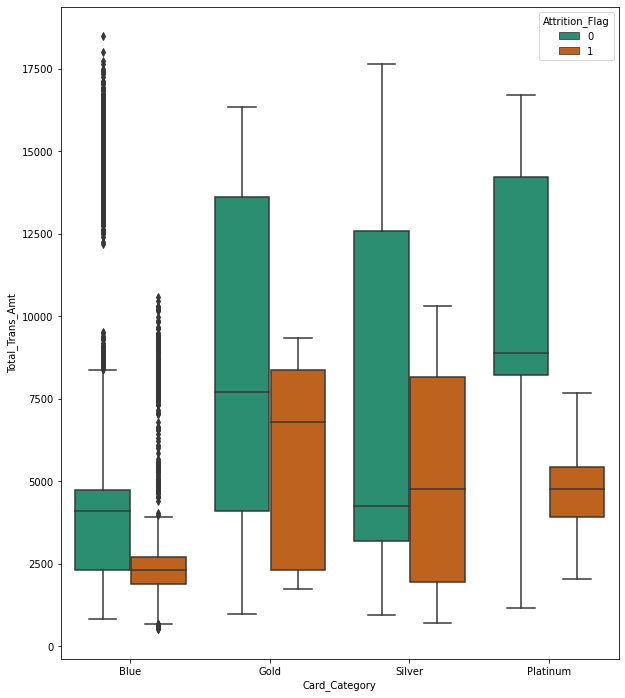

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Total_Trans_Amt",
    x="Card_Category",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with transaction amount less than 9000 show attrition with regards to which card category they belong to.

### How Avg_Utilization_Ratio varies with Months_Inactive_12_mon accross Attrition_Flag

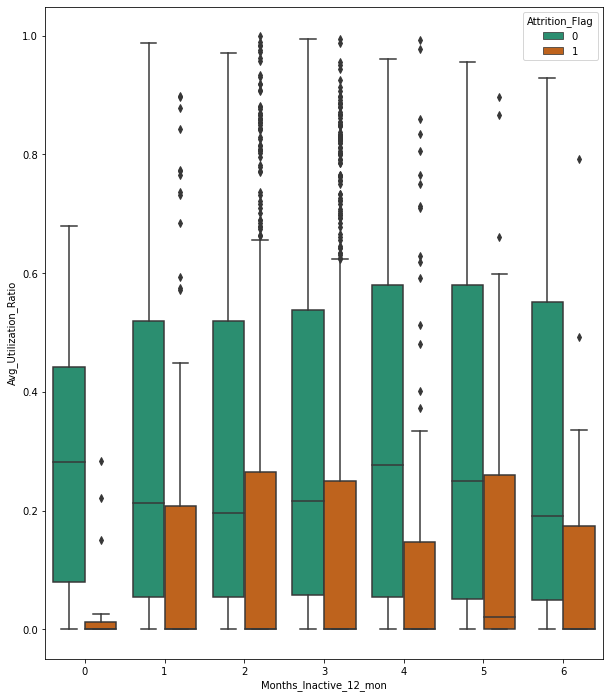

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Avg_Utilization_Ratio",
    x="Months_Inactive_12_mon",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with Avg_Utilization_Ratio  less than 0.3 show attrition with regards to  months they were inactive.

### How Card_Category varies with Avg_Utilization_Ratio accross Attrition_Flag

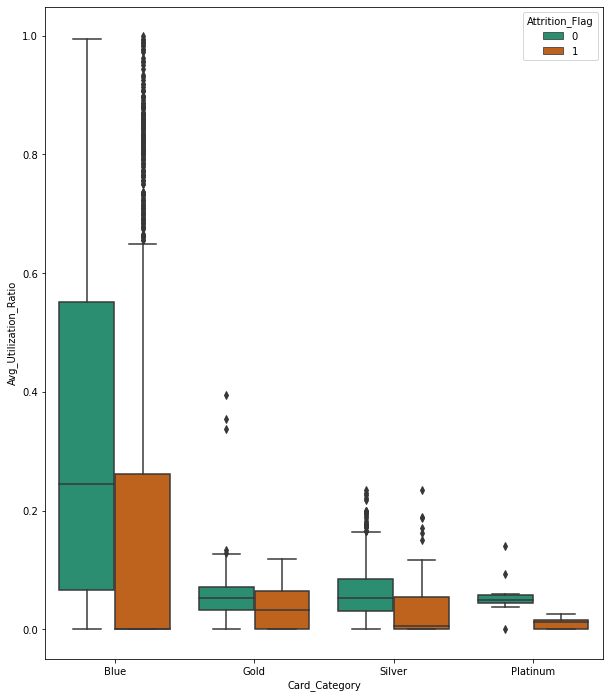

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Avg_Utilization_Ratio",
    x="Card_Category",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with Avg_Utilization_Ratio  less than 0.3 show attrition with regards to the Card_Category they belong to.

### How Card_Category varies with Total_Revolving_Balance accross Attrition_Flag

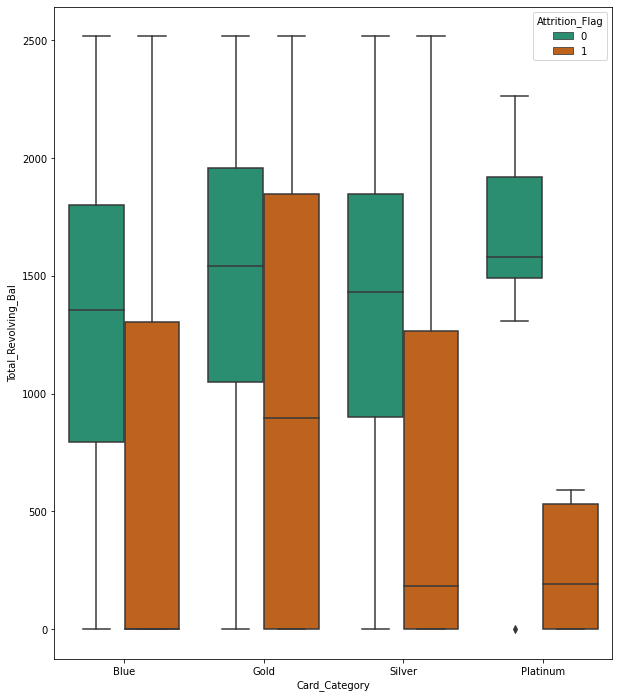

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Total_Revolving_Bal",
    x="Card_Category",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with Total_Revolving_Balance  less than 2000 show attrition with regards to the Card_Category they belong to.

### How Card_Category varies with Total_Trans_Ct accross Attrition_Flag

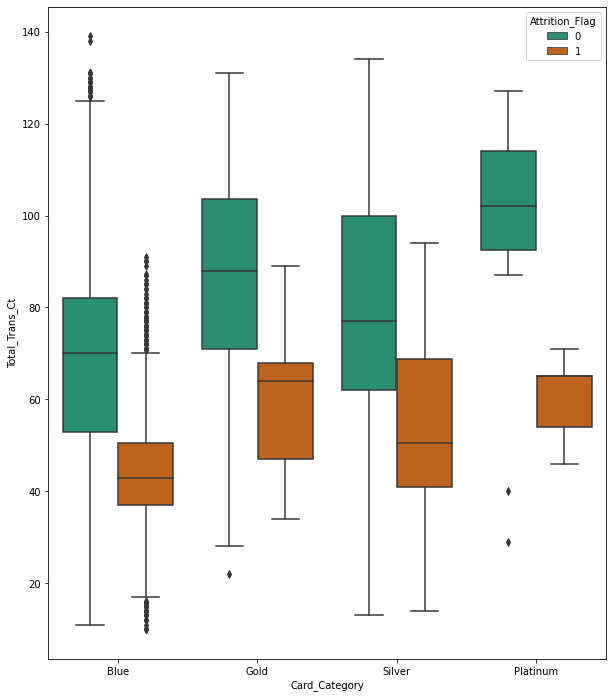

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Total_Trans_Ct",
    x="Card_Category",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with Total_Trans_Ct  less than 70 show attrition with regards to the Card_Category they belong to.

### How Card_Category varies with Total_Amt_Chng_Q4_Q1 accross Attrition_Flag

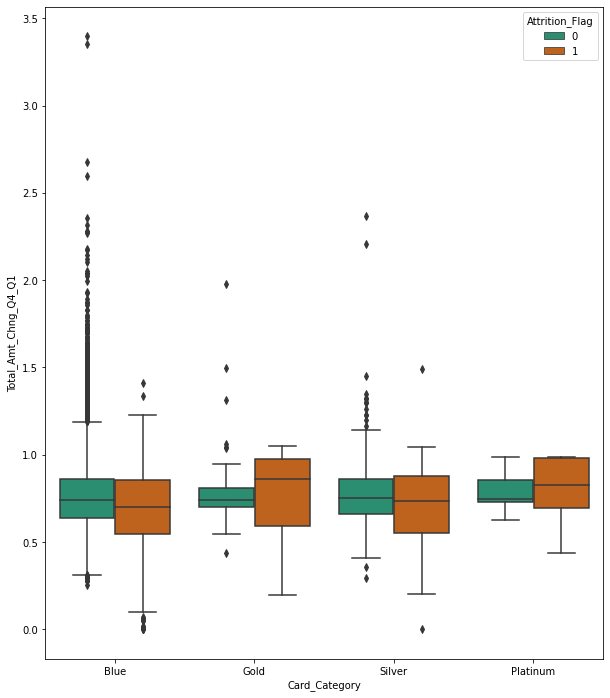

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Total_Amt_Chng_Q4_Q1",
    x="Card_Category",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with Total_Amt_Chng_Q4_Q1  less than 1 show attrition with regards to the Card_Category they belong to.
2. Existing customers have a Total_Amt_Chng_Q4_Q1 range between 0.5 and 1

### How Months_Inactive_12_mon varies with Total_Revolving_Bal accross Attrition_Flag

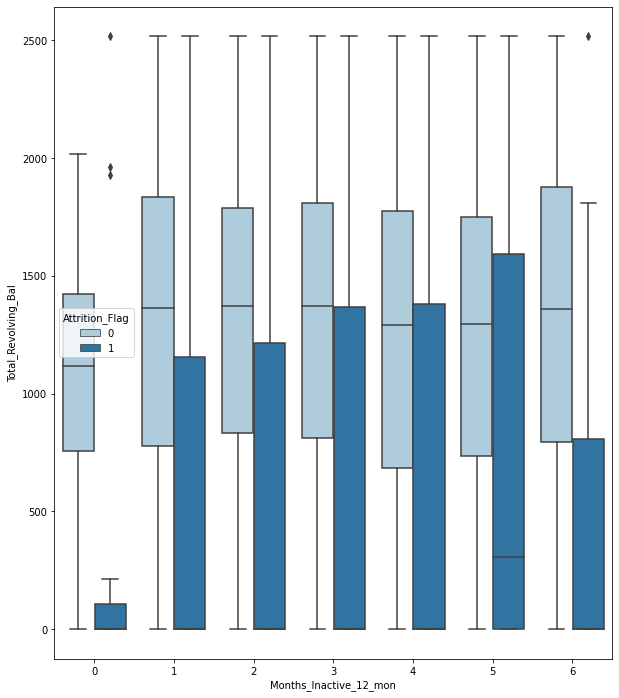

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Total_Revolving_Bal",
    x="Months_Inactive_12_mon",
    data=data,
    hue="Attrition_Flag",
    palette="Paired",
)
plt.show()

#### Observations
1. Customers with Total_Revolving_Balance less than 1600 show attrition with regards to the Months they were inactive.


### How Months_Inactive_12_mon varies with Avg_Utilization_Ratio accross Attrition_Flag

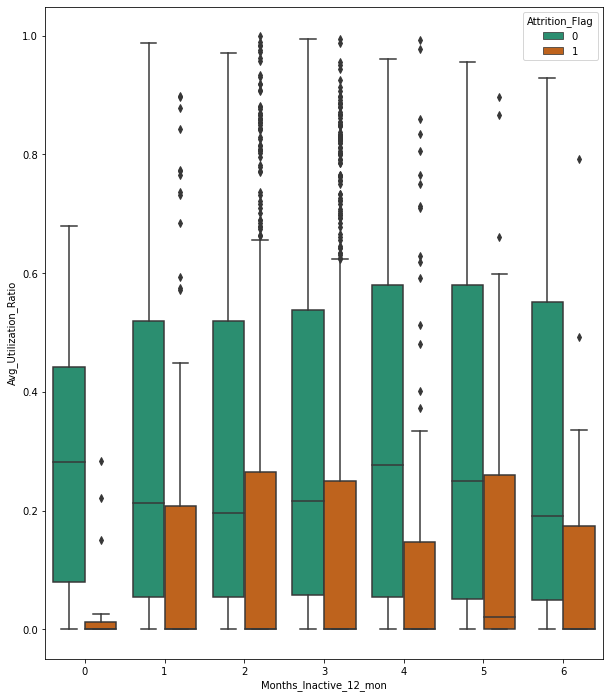

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Avg_Utilization_Ratio",
    x="Months_Inactive_12_mon",
    data=data,
    hue="Attrition_Flag",
    palette="Dark2",
)
plt.show()

#### Observations
1. Customers with Avg_Utilization_Ratio less than 0.3 show attrition with regards to the Months they were inactive.


### How Income_Category varies with Total_Trans_Ct accross Card_Category

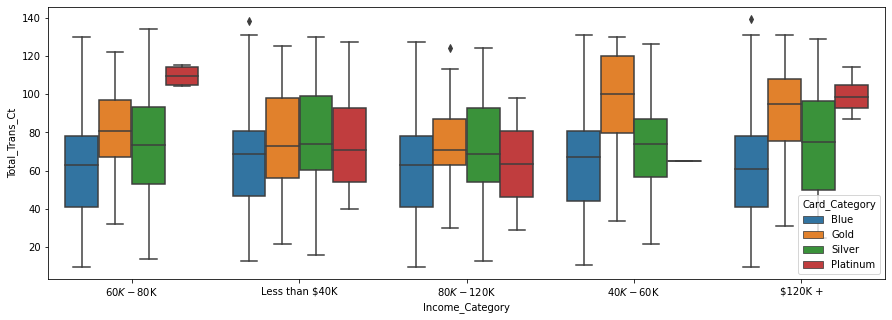

<IPython.core.display.Javascript object>

In [ ]:
# Boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data["Income_Category"], data["Total_Trans_Ct"], hue=data["Card_Category"])
plt.show()

#### Observations
1. 40k-60k income gruop customers with gold card has the highest Total_trans_Ct
2. 120k+ income customers  with blue card have low Total_trans_Ct

### How Income_Category varies with Total_Revolving_Bal across Card_Category

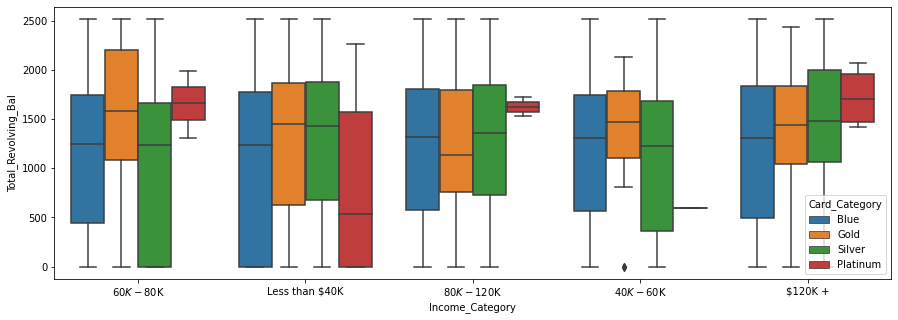

In [66]:
# Boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data["Income_Category"], data["Total_Revolving_Bal"], hue=data["Card_Category"])
plt.show()

#### Observations
1. 60k-80k income gruop customers with gold card has the highest revolving balance.
2. Less than 40k income customers  with platinum card have low revolving balance

### How Gender varies with Total_Revolving_Balance across Card_Category

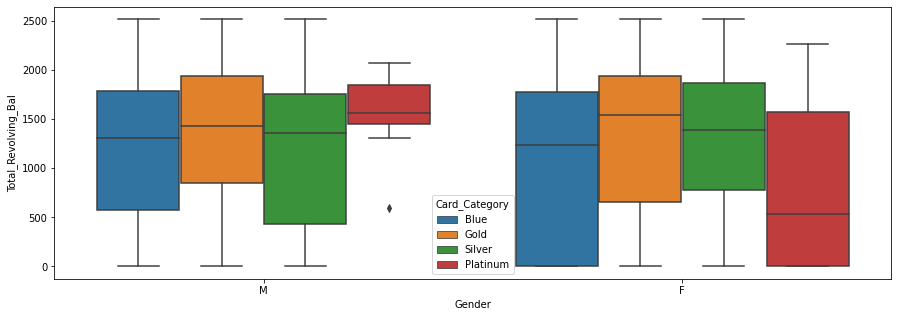

In [65]:
# Boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data["Gender"], data["Total_Revolving_Bal"], hue=data["Card_Category"])
plt.show()

#### Observations
1. Male and female customers with gold card has the highest revolving balance.
2. Felame with platinum have low revolving balance but male with platinum card has higher revolving balance

### How Income_Category varies with Total_Trans_Amt across Attrition_Flag in each of the Card_Category

<Figure size 1080x1440 with 0 Axes>

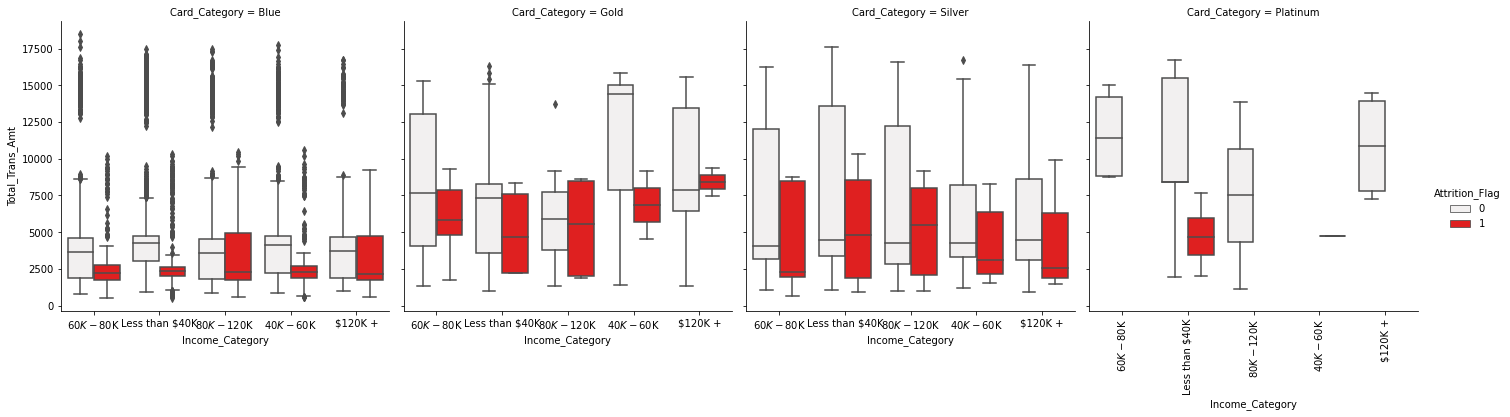

In [61]:
# Catplot
plt.figure(figsize=(15, 20))


sns.catplot(
    data=data,
    y="Total_Trans_Amt",
    x="Income_Category",
    col="Card_Category",
    hue="Attrition_Flag",
    kind="box",
    color = "red"
)
plt.xticks(rotation=90)
plt.show()

#### Observations
#### Blue Card
1. All income categories have same transaction amounts  and  those with less than 5000 transaction amount show atrrition.
#### Gold 
2. 40k-60k income customers have high transaction amount . All income categories spending less than 7500 show attrition.
#### Silver
3. Less than 40k-80k income customers have high transaction amount .All income categories spending less than 7500 show attrition.
#### Platinum
4. Less than 40k-80k income customers have high transaction amounts and All income categories spending less than 4000 show attrition.

### How Marital_Status varies with Total_Trans_Amt across Attrition_Flag in each of the Card_Category

<Figure size 1080x1440 with 0 Axes>

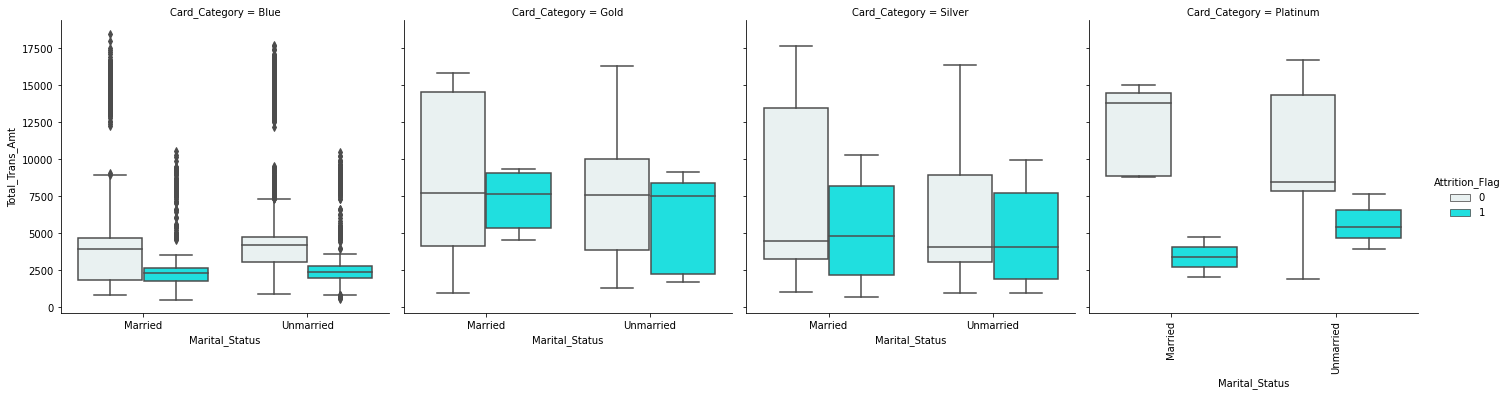

In [62]:
plt.figure(figsize=(15, 20))

# Catplot
sns.catplot(
    data=data,
    y="Total_Trans_Amt",
    x="Marital_Status",
    col="Card_Category",
    hue="Attrition_Flag",
    kind="box",
    color="cyan"
)
plt.xticks(rotation=90)
plt.show()

#### Observations
#### Blue Card
1. Unmarried have high transaction amounts  and  those with less than 3000 transaction amount show atrrition.
#### Gold 
2. Existing Married customers have high transaction amount . Both married and unmarried pending less than 10000 show attrition.
#### Silver
3. Existing Married customers have high transaction amount .Both married and unmarried spending less than 9000 show attrition.
#### Platinum
4. Existing married and existing unmarried have high transaction amounts and Both married and unmarried spending less than 6000 show attrition.

### How Gender varies with Total_Trans_Amt accross Attrition_Flag in each of the Card_Category

<Figure size 1080x1440 with 0 Axes>

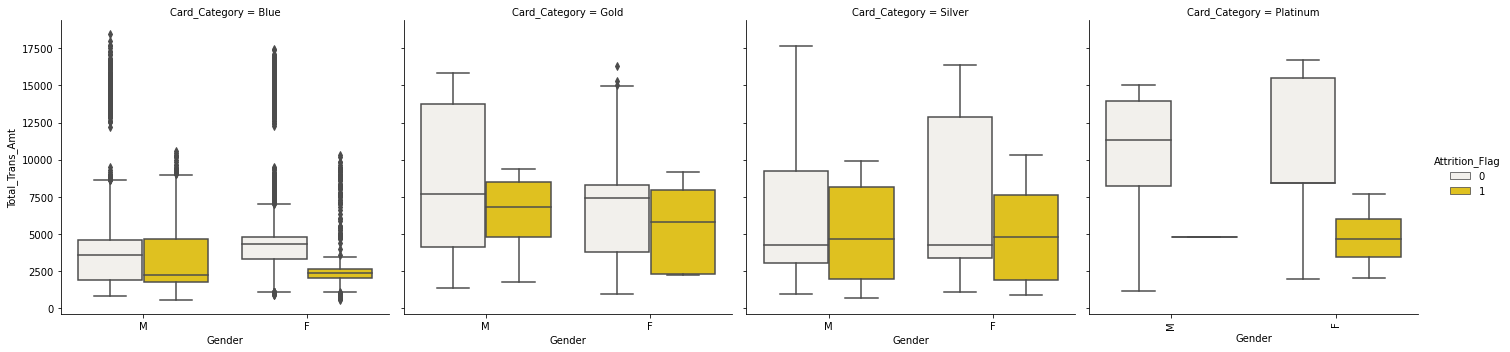

In [63]:
plt.figure(figsize=(15, 20))

# Catplot
sns.catplot(
    data=data,
    y="Total_Trans_Amt",
    x="Gender",
    col="Card_Category",
    hue="Attrition_Flag",
    kind="box",
    color="gold"
)
plt.xticks(rotation=90)
plt.show()

#### Observations
#### Blue Card
1. Existing Females have high transaction amounts  and  those with less than 4500 transaction amount show atrrition.
#### Gold 
2. Existing male customers have high transaction amount . Both male and female pending less than 10000 show attrition.
#### Silver
3. Existing female customers have high transaction amount .Both male and female spending less than 8500 show attrition.
#### Platinum
4. Existing Females have high transaction amounts and those spending less than 5500 show attrition.

## Summary for EDA

### Data Description 
1. The dataset has 10127 rows and 21 columns.
2. Attrition_flag,Gender,Education_Level,Marital_status,Income_Category,Card_category are all object datatype, the rest are all int64 or float64 datatypes.
3. Education_Level,Marital_status ahve missing values in them. 4. All the others do not have any missing values.
5. There are no duplicate values in the data.

### Statistical Data Summary
1. Mean value for the age column is approx 46 and the median is also 46. This shows that majority of the customers are 40 years of age group.
2. Customers have a mean and median replationship with the bank (Months_on_book) of about 36 months and reaching to 56 months as the maximum.
3. Credit_Limit : The average credit limit on the card is 8631 while the medain is about 4549 and has a maximum range of 34516.
4. Total_Revolving_Bal: The agv balance that carries over from one month to the next is 1162.814 and ranges from 0 to 2517.
5. Avg_Open_To_Buy for the last 12 months has a mean of 7469 and has a wide range from 3 to 34516.
6. Avg_Utilization_Ratio:  Representing how much of the available credit the customer spent, this variable has a mean of 
7. Total_Trans_Amt : The average total transaction amount by a customer in the last 12 months is about 4404.086 and has a range from 510.000 to 18484.
8. Total_Trans_Ct :The average total transaction count by a customer in the last 12 months is 65 and has a wide range from 10 to 139.
9. Total_Amt_Chng_Q4_Q1: The average for this ratio of the total transaction amount in the 4th and the 1st quarter is 0.76 and ranges from 0 to 3.3
10. Total_Ct_Chng_Q4_Q1 :The average for this ratio of the total transaction count in the 4th and the 1st quarter is 0.71 and ranges from 0 to 3.714.

### Value_counts Summary
1. The Attrition flag is the target variable. We have less number of attrited customers in the dataset showing imbalance.
2. Most of the customers have 3 or 2 dependents.
3. Most of the customers are female customers.
4. Most of the customers are graduates.
5. Most of the customers are Married.
6. Most of the customers are in the income range less that 40k.
7. Most of the  customers are in the blue card category 
8. Many customers have either 3 or 4  products.
9. Many customers are inactive for 3 or 2 months in the last 12 months.
10. Many customers have 3 or 2 times Contact with bank in the last 12 months

### Data Preprocessing
1. Dropping the CLIENTNUM column.
2. Replaced the "abc" with the most frequent value.
3. Joining the the Divorced and single into one category Unmarried.

### Outlier Analysis
1. Credit_limit : Has upper outliers
2. Avg_Open_To_Buy : Has upper outliers
3. Total_Amt_Chng_Q4_Q1:Has upper and lower outliers
4. Total_Trans_Amt : Has upper outliers
5. Total_Ct_Chng_Q4_Q1: Has upper and lower outliers

### Outlier Detection using the IQR method
#### Credit_Limit Outlier Detection
1. There are no observations beyond the 4* times IQR range for the Credit_Limit Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
#### Avg_Open_To_Buy Outlier Detection
1. There are no observations beyond the 4* times IQR range for the Avg_Open_To_Buy Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
#### Total_Trans_Amt Outlier Detection
1. There are no observations beyond the 4* times IQR range for the Total_Trans_Amt Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
#### Total_Amt_Chng_Q4_Q1 Outlier Detection
1. There are no observations beyond the 4* times IQR range for the Total_Amt_Chng_Q4_Q1 Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
#### Total_Ct_Chng_Q4_Q1 Outlier Detection
1. There are only 37 observations beyond the 4* times IQR range for the Total_Ct_Chng_Q4_Q1 Column.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

### tmean Outlier Check
#### Credit_Limit tmean Outlier Check
1. There is no significant change in the tmean for both the analysis in Credit_Limit column.
2. Hence we will not remove the outliers. They hold valuable informations.
#### Avg_Open_To_Buy tmean Outlier Check
1. There is no significant change in the tmean for both the analysis in Avg_Open_To_Buy column.
2. Hence we will not remove the outliers. They hold valuable informations.
#### Total_Trans_Amt tmean Outlier Check
1. There is no significant change in the tmean for both the analysis in Avg_Open_To_Buy column.
2. Hence we will not remove the outliers. They hold valuable informations.
#### Total_Amt_Chng_Q4_Q1 tmean Outlier Check
1. There is only a very small change in the tmean for both the analysis in Total_Amt_Chng_Q4_Q1 column.
2. Hence we will not remove the outliers. They hold valuable informations.

#### Total_Ct_Chng_Q4_Q1 tmean Outlier Check
1. There is only a very small change in the tmean for both the analysis in Total_Ct_Chng_Q4_Q1 column.
2. Hence we will not remove the outliers. They hold valuable informations.

# EDA Observations

### Univariate Annalysis- Numerical COlumns
#### Age
1. The distribution of Age is normal with a mean of 46.
2. There are outliers present.
3. The boxplot shows that the 3rd quartile is about 52 which means that about 75% of the customers are less than age 52.<br>

#### Month_on_Book
1. The distribution of Months_on_book is almost normal with a mean of 36 months.
2. There are outliers present on both sides.
3. The boxplot shows that the 3rd quartile is about 40 months which means that about 75% of the customers have Months_on_book value   less than 40.<br>

#### Credit_Limit
1. The distribution of Credit_Limit is right skewed with a mean of 36 months.
3. there is an extreme value of 35000.
2. There are many outliers present.
3. The boxplot shows that the 3rd quartile is about 11067.5 which means that about 75% of the customers have Credit_Limit value less than 11067.5<br>

#### Total_Revolving_Bal
1. There are much values with **0**. A value of zero Total_Revolving_Bal is possible.
2. From the boxplot, we can see that the third quartile (Q3) is equal to 1784 dollars, which means 75% of customers have less than 1784 dollars of Total_Revolving_Bal  and an average skin thickness of 1162.8 dollars.<br>

#### Total_Trans_Amt
1. The distribution of Total_Trans_Amt is right skewed with a mean of 4404 dollars.
2. There are many outliers present.
3. The boxplot shows that the 3rd quartile is about 4741 which means that about 75% of the customers have Total_Trans_Amt value less than 4741<br>

#### Total_Trans_Ct
1. The distribution of Total_Trans_Ct is almost normal with a mean of 65 months.
2. There are  outliers present.
3. The boxplot shows that the 3rd quartile is about 81 which means that about 75% of the customers have Total_Trans_Ct value less than 81.<br>

#### Avg_Open_To_Buy
1. There are 0 values in this columns. Hvaing a 0 dollars Avg_Open_To_Buy is possible.
2. The distribution of Avg_Open_To_Buy is right skewed with a mean of 7469 dollars.
3. There are many outliers present.
4. The boxplot shows that the 3rd quartile is about 9859 dollars which means that about 75% of the customers have Avg_Open_To_Buy value less than 9859 dollars<br>

#### Avg_Utilization_Ratio
1. The distribution of Avg_Utilization_Ratio is right skewed with a mean of 0.27 
2. There are no outliers.
3. The boxplot shows that the 3rd quartile is about 0.53 which means that about 75% of the customers have Avg_Utilization_Ratio value less than  0.53<br>

#### Total_Amt_Chng_Q4_Q1
1. The distribution of Total_Amt_Chng_Q4_Q1 is almost normal with a mean ratio of 0.760 
2. There are many outliers present on both sides.
3. The boxplot shows that the 3rd quartile is about 0.8 which means that about 75% of the customers have Total_Amt_Chng_Q4_Q1 value less than 0.8<br>

#### Total_Ct_Chng_Q4_Q1
1. The distribution of Total_Ct_Chng_Q4_Q1 is almost normal with a mean ratio of 0.712 
2. There are many outliers present on both sides.
3. The boxplot shows that the 3rd quartile is about 0.81 which means that about 75% of the customers have Total_Ct_Chng_Q4_Q1 value less than 0.81<br>

### Univariate Annalysis- Categorical COlumns<br>

#### Attrition_Flag
1. 83.9% of the customers are Existing customers.<br>

#### Dependent_count
1. 53.2% of the customers have either 2 or 3 dependants.
2. 18.1 % of customers have 1 dependant.
3. 15.5% have 4 dependents<br>

#### Gender
1. 52.9% of the customers are females
2. 47.1 % of customers are male<br>

#### Education_Level
1. 30.9% of the customers are graduates.
2. 19.9 % of customers are done high school.
3. 14.7% of customers are uneducated.
4. 5.1% are post graduates
5. 4.5% are docrate holders
6. The percentage dont add up to 100 because of missing values<br>

#### Marital_Status
1. 46.3% are married and 46.3% are unmarried.
2. The percentage dont add up to 100 because of missing values<br>

#### Income_Category
1. 46.1% of customers have income Less than 40k.
2. 17.7% of customers are in income range of 40-60k.
3. 13.8% of customers are in income range of 60-80k.
4. 15.2% of customers are in income range of 80-120k.
5. 7.2%  of customers are in income range above 120k.<br>

#### Total_Relationship_Count
1. 22.8% of customers hold 3 products.
2. 18.9% hold 4 products followed by 18.7% holds 5 products and 18.4% holds 6 products.
3. 12.3% hold 2 products.
4. 9% hold 1 product<br>

#### Months_Inactive_12_mon
1. 38% of customers are inactive for 3 months in the last 12 months.
2. 32.4% of customers are inactive for 2 months in the last 12 months.
3. 22% of customers are inactive for 1 month in the last 12 months.
4. 4.3% of customers are inactive for 4 months ollowed by 1.8% inactive for 5 months and 1.2% inactive for 6 months
5. only 0.3% were active all the months<br>

#### Contacts_Count_12_mon
1. 33.4% of customers have contacted the bank 3 times in the last 12 months.
2. 31.9% of customers have contacted the bank 2 times in the last 12 months.
3. 14.8% of customers have contacted the bank once in the last 12 months, 13.7% have contacted 4 times,1.7% 5 times nad 0.5% 6 times<br>

#### Card_Category
1. 93.2% of customers have the blue card_category followed by 5.5% with Silver category.
2. 1.1% have the Cold Card_category anf only 0.2% have the Platinum Card_Category<br>


### Encoding Attrition Flag - The target variable
1. The target variable is encoded as 0 and 1.<br>

### Bivariate Annalysis- Numerical COlumns
### heatmap<br>

#### Positive Correlation
1. Customer Age and Months_oon_Book have a high positive correlation of value 0.79.
2. Total_Trans_Amt and Total_Trans_Ct are highly positively correlated with value 0.81.
3. Avg_Utilization_Ratio and Total_Revolving_Balance  are positively correlated with value 0.62<br>

#### Negative Correlation
1. Avg_Utilization_Ratio and Avg_Open_to_buy are negatively correlated with value -0.54
2. Avg_Utilization_Ratio and Credit_Limit are  negatively correlated with value -0.48<br>

##### Other correlations are not strong either with the target or between any independant variables.<br>
#### PairPlot
1. There are overlaps i.e. no clear distinction in the distribution of variables for customers who are existing and who are atrrited.
2. Let's explore this further with the help of other plots.<br>

### Multivariate Annalysis- Numerical COlumns<br>

#### Credit_Limit" vs "Attrition_Flag
1. We can see that the Credit_Limit's second and third quartile of attrition customers is lesser than the second and third quartile of existing customers.
2. This shows that customers with very low Credit_Limit are more likely to show attrition.<br>

#### "Months_on_book" vs "Attrition_Flag
1. There is no difference in Months_on_book of attriting and non-attriting customers.<br>

#### "Total_Revolving_Bal" vs "Attrition_Flag"
1. We can see that the Total_Revolving_Bal's third quartile of attrition customers is  lesser than the second and  third quartile of existing customers.
2. This shows that customers with very low Total_Revolving_Bal are more likely to show attrition.<br>
#### "Avg_Open_To_Buy" vs "Attrition_Flag"

1. There is no difference in Avg_Open_To_Buy of attriting and non-attriting customers.<br>

#### "Avg_Utilization_Ratio" vs "Attrition_Flag"
1. We can see that the Avg_Utilization_Ratio's  third quartile of attrition customers is very less than the third quartile of existing customers.
2. This shows that customers with very low Avg_Utilization_Ratio  are more likely to show attrition.<br>

#### "Total_Trans_Amt" vs "Attrition_Flag"
1. We can see that the Total_Trans_Amt's second and third quartile of attrition customers is very less than the  second and third quartile of existing customers.
2. This shows that customers with very low Total_Trans_Amt  in the last 12 months are more likely to show attrition<br>

#### "Total_Trans_Ct" vs "Attrition_Flag
1. We can see that the second and third quartile  of attrition customers is very less than the first, second and third quartile  of existing customers.
2. This shows that customers with very low Total_Trans_Ct in the last 12 months are more likely to show attrition<br>

#### "Total_Amt_Chng_Q4_Q1" vs "Attrition_Flag"
1. We can see that the median Total_Amt_Chng_Q4_Q1 of attrition customers is less than median Total_Amt_Chng_Q4_Q1 of existing customers.
2. this shows that customers with LOWER Ratio of  total transaction amount in 4th quarter and the total transaction amount in 1st quarter are more likely to show attrition<br>

#### Total_Ct_Chng_Q4_Q1" vs "Attrition_Flag
1. We can see that the second and third quartile of customers who show attrition are much less than the second and third quartile of non-attrition customers.
2. This shows that the customers with LOWER Ratio of  total transaction count in 4th quarter and the total transaction count in 1st quarter are more likely to show attrition.<br>

#### Customer_Age" vs "Attrition_Flag"
1. Customers with median age of about  49 show more attrition This shows that customers with a higher can show more attrition than young customerss<br>


### Multivariate Annalysis- Categorical COlumns
#### Dependant_count" vs "Attrition_Flag"
1. There is no significant difference concerning the Dependent_count
2. However,  customers with 3 dependants are more likely to show attrition  as compared to other  customers with other dependants .<br>

#### Education_level" vs "Attrition_Flag"
1. Doctorate holders are more likely to show attrition followed by post-graduates than other customers.
2. This may be because they are well educated and aware that credit cards will make people in debt and liable to the bank<br>

#### Marital_Status" vs "Attrition_Flag"
1. Unmarried customers show more attrition than married customers
2. This may be because their needs are lesser.<br>

#### Income_Group" vs "Attrition_Flag"
1. Customers with 120k+ dollars are more likely to show attrition followed by customers with less than 40k dollars.<br>
#### Card_Category" vs "Attrition_Flag"
1. Customers with Platinum Card_category are more likely to show attrition followed by customers with Gold card_category.<br>

#### Total_Relationship_Count" vs "Attrition_Flag"
1. Customers with 2  products held by them  are more likely to show highest attrition followed by customers with 1  products held by them.<br>

#### Months_inactive_in12months" vs "Attrition_Flag"
1. Customers who show high activness show highest attrition followed by customers with 4 months of inactiveness show attrition.<br>

#### Contacts_Count_12_mon" vs "Attrition_Flag
1. Customers who have contacted the back for 6 times show highest attrition followed by customers who contacted the bank 5 times.<br>



# Business Questions<br>

### How Card_Category varies with Total_trans_Amt accross Attrition_Flag
1. Customers with transaction amount less than 9000 show attrition with regards to which card category they belong to.<br>

### How Avg_Utilization_Ratio varies with Months_Inactive_12_mon accross Attrition_Flag
1. Customers with Avg_Utilization_Ratio  less than 0.3 show attrition with regards to  months they were inactive.<br>

### How Card_Category varies with Avg_Utilization_ratio accross Attrition_Flag
1. Customers with Avg_Utilization_Ratio  less than 0.3 show attrition with regards to the Card_Category they belong to.<br>

### How Card_Category varies with Total_Revolving_Balance accross Attrition_Flag
1. Customers with Total_Revolving_Balance  less than 2000 show attrition with regards to the Card_Category they belong to.<br>

### How Card_Category varies with Total_Trans_Ct accross Attrition_Flag
1. Customers with Total_Trans_Ct  less than 70 show attrition with regards to the Card_Category they belong to.<br>

### How Card_Category varies with Total_Amt_Chng_Q4_Q1 accross Attrition_Flag
1. Customers with Total_Amt_Chng_Q4_Q1  less than 1 show attrition with regards to the Card_Category they belong to.
2. Existing customers have a Total_Amt_Chng_Q4_Q1 range between 0.5 and 1<br>

### How Months_Inactive_12_mon varies with Total_Revolving_Bal accross Attrition_Flag
1. Customers with Total_Revolving_Balance less than 1600 show attrition with regards to the Months they were inactive.<br>

### How Months_Inactive_12_mon varies with Avg_Utilization_Ratio accross Attrition_Flag
1. Customers with Avg_Utilization_Ratio less than 0.3 show attrition with regards to the Months they were inactive.<br>

### How Income_Category varies with Total_Trans_Ct accross Card_Category
1. 40k-60k income gruop customers with gold card has the highest Total_trans_Ct
2. 120k+ income customers  with blue card have low Total_trans_Ct<br>

### How Income_Category varies with Total_Revolving_Bal across Card_Category
1. 60k-80k income gruop customers with gold card has the highest revolving balance.
2. Less than 40k income customers  with platinum card have low revolving balance<br>

### How Gender varies with Total_Revolving_Balance across Card_Category
1. Male and female customers with gold card has the highest revolving balance.
2. Felame with platinum have low revolving balance but male with platinum card has higher revolving balance<br>

### How Income_Category varies with Total_Trans_Amt across Attrition_Flag in each of the Card_Category
#### Blue Card
1. All income categories have same transaction amounts  and  those with less than 5000 transaction amount show atrrition.<br>

#### Gold 
2. 40k-60k income customers have high transaction amount . All income categories spending less than 7500 show attrition.<br>

#### Silver
3. Less than 40k-80k income customers have high transaction amount .All income categories spending less than 7500 show attrition.<br>

#### Platinum
4. Less than 40k-80k income customers have high transaction amounts and All income categories spending less than 4000 show attrition.<br>

### How Marital_Status varies with Total_Trans_Amt across Attrition_Flag in each of the Card_Category
#### Blue Card
1. Unmarried have high transaction amounts  and  those with less than 3000 transaction amount show atrrition.<br>

#### Gold 
2. Existing Married customers have high transaction amount . Both married and unmarried pending less than 10000 show attrition.<br>

#### Silver
3. Existing Married customers have high transaction amount .Both married and unmarried spending less than 9000 show attrition.<br>

#### Platinum
4. Existing married and existing unmarried have high transaction amounts and Both married and unmarried spending less than 6000 show attrition.<br>

### How Gender varies with Total_Trans_Amt accross Attrition_Flag in each of the Card_Category
#### Blue Card
1. Existing Females have high transaction amounts  and  those with less than 4500 transaction amount show atrrition.<br>

#### Gold 
2. Existing male customers have high transaction amount . Both male and female pending less than 10000 show attrition.<br>

#### Silver
3. Existing female customers have high transaction amount .Both male and female spending less than 8500 show attrition.<br>

#### Platinum
4. Existing Females have high transaction amounts and those spending less than 5500 show attrition.<br>

## Treating the Missing values 

#### KNN imputer 
Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
KNN imputer replaces missing values using the average of k nearest non-missing feature values.
Nearest points are found based on euclidean distance.<br>
In case of categorical data  we will round off the obtained values to nearest integer value<br>

In [95]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [96]:
#required columns for imputation
cols_to_impute = ["Education_Level", "Marital_Status"]

In [97]:
#Copy data to data1
data1 = data.copy()

In [99]:
# passing numerical values for each categorical column for KNN imputation so we will label encode them

Education = {
    "Graduate": 0,
    "High School": 1,
    "Uneducated": 2,
    "College": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
data1["Education_Level"] = data1["Education_Level"].map(Education)
#MArital Status encoding
Marital_Status = {"Unmarried": 0, "Married": 1}
data1["Marital_Status"] = data1["Marital_Status"].map(Marital_Status)

#### Observations
1. The values are encoded.

## Data Preparation for Modelling

In [101]:
#X and y preparation
X = data1.drop("Attrition_Flag", axis=1)
y = data1["Attrition_Flag"]

## Splitting the data into 3 sets - Train, Validation and Test

In [102]:
# split into 2 parts temp and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# split temp into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [103]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


## Checking the composition of the classs

In [104]:
print(
    "Checking for the class composition in train \n",
    y_train.value_counts(normalize=True),
)
print(
    "Checking for the class composition in validation \n",
    y_val.value_counts(normalize=True),
)
print(
    "Checking for the class composition in test \n", y_test.value_counts(normalize=True)
)

Checking for the class composition in train 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Checking for the class composition in validation 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
Checking for the class composition in test 
 0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


## Imputing Missing values

In [105]:
# KNN IMputer
impute = KNNImputer(n_neighbors=5)

In [106]:
#Fit and transform the train data
X_train[cols_to_impute] = impute.fit_transform(X_train[cols_to_impute])

#Fit and transform the train data
X_val[cols_to_impute] = impute.fit_transform(X_val[cols_to_impute])

#Fit and transform the train data
X_test[cols_to_impute] = impute.fit_transform(X_test[cols_to_impute])

In [107]:
print(X_train.isnull().sum())
print("\n")
print(X_val.isnull().sum())
print("\n")
print(X_test.isnull().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy          

#### Observations
1. All the missing values have been treated
2. Let reverse encode the data back

## Function for inverse mapping

In [108]:
#Function to reverse encode
def reverse_map(x, y):
    reverse_dict = {d: s for s, d in x.items()}
    X_train[y] = np.round(X_train[y]).map(reverse_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(reverse_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(reverse_dict).astype("category")

In [109]:
reverse_map(Education, "Education_Level")
reverse_map(Marital_Status, "Marital_Status")

In [110]:
# checking the encoded columns
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("\n")

F    3193
M    2882
Name: Gender, dtype: int64


Graduate         1854
High School      1728
Uneducated       1309
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64


Married      3094
Unmarried    2981
Name: Marital_Status, dtype: int64


Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64


Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64




In [111]:
# checking the encoded columns
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("\n")

F    1095
M     931
Name: Gender, dtype: int64


Graduate         623
High School      569
Uneducated       435
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64


Unmarried    1033
Married       993
Name: Marital_Status, dtype: int64


Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64


Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64




In [112]:
# checking the encoded columns
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("\n")

F    1070
M     956
Name: Gender, dtype: int64


Graduate         651
Uneducated       571
High School      407
College          196
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64


Unmarried    1090
Married       936
Name: Marital_Status, dtype: int64


Less than $40K    933
$40K - $60K       370
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64


Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64




## Creating the Dummy Variables

In [113]:
#creating dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape,X_val.shape,X_test.shape)

(6075, 28) (2026, 28) (2026, 28)


#### Observations
1. After encoding there are 28 columns

## Building the model
Model evaluation criterion:
#### Model can make wrong predictions as:
Predicting a customer will show attrition  but in reality, the customer is not willing to show attrition - Loss of resources
Predicting an customer is not willing to show attrition but the customer  shows attrition - Loss of opportunity
#### Most important Case for the bank credit card attrition 
Predicting an customer is not willing to show attrition but the customer  shows attrition i.e. losing on a potential candidate as the candidate will not be targeted by the bank team when he should be targeted.
####  How to reduce this loss i.e need to reduce False Negatives?
Bank would want Recall to be maximized, greater the **Recall** lesser the chances of false negatives.

In [114]:
def model_performance(model, predictors, target):
    """
    Function to compute different metrics 

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    dataframe_performance = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return dataframe_performance

In [115]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


## 6 Models sampling with original train and val data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list

models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


cv_score_results = []  #  list to store all  CV scores
names = []  #  list to store name of the models
val_recall_score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    cv_score_results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    print(name)
    print("\n")
    val_perf = model_performance(model, X_val, y_val)
    print(val_perf)
    print("\n")
    scores = recall_score(y_val, model.predict(X_val))
    val_recall_score.append(scores)
    print("{}: {}".format(name + "_recall", scores))
    print("\n")


Cross-Validation Performance:

dtree: 78.2778649921507
Bagging: 79.30245944531659
Random forest: 77.35426478283621
GBM: 81.96336996336997
Adaboost: 82.16745159602303
Xgboost: 85.75667189952905

Validation Performance:

dtree


   Accuracy  Recall  Precision    F1
0     0.937   0.810      0.800 0.805


dtree_recall: 0.8098159509202454


Bagging


   Accuracy  Recall  Precision    F1
0     0.952   0.798      0.890 0.841


Bagging_recall: 0.7975460122699386


Random forest


   Accuracy  Recall  Precision    F1
0     0.959   0.807      0.929 0.864


Random forest_recall: 0.8067484662576687


GBM


   Accuracy  Recall  Precision    F1
0     0.969   0.865      0.940 0.901


GBM_recall: 0.8650306748466258


Adaboost


   Accuracy  Recall  Precision    F1
0     0.962   0.853      0.906 0.878


Adaboost_recall: 0.852760736196319


Xgboost


   Accuracy  Recall  Precision    F1
0     0.971   0.887      0.932 0.909


Xgboost_recall: 0.8865030674846626




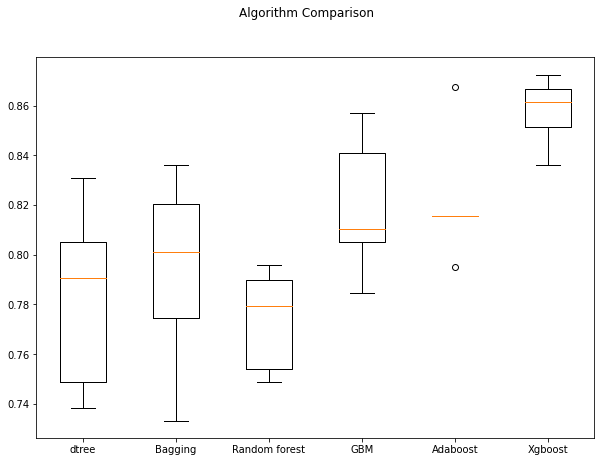

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_score_results)
ax.set_xticklabels(names)

plt.show()

#### Observations
1. We can see that XGBoost is giving the highest cross-validated recall followed by GBM.
2. The boxplot shows that the performance of GBM  and xgboost is consistent and their performance on the validation set is also good when compared to other models.
3. Though boxplot shos Adaboost median higher than GBM, the GBM on validation set is better than Adaboost.
4. We will tune - GBM and XGBoost and see if the performance improves.

## Oversampling train data using SMOTE

In [122]:
print(
    "Before Oversampling, counts of label 'Attrition Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before Oversampling, counts of label 'Existing Customer': {} \n".format(
        sum(y_train == 0)
    )
)

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print(
    "After Oversampling, counts of label 'Attrition Customer': {}".format(
        sum(y_train_over == 1)
    )
)
print(
    "After Oversampling, counts of label 'Existing Customer': {} \n".format(
        sum(y_train_over == 0)
    )
)


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrition Customer': 976
Before Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, counts of label 'Attrition Customer': 5099
After Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, the shape of train_X: (10198, 28)
After Oversampling, the shape of train_y: (10198,) 



## 6 Models sampling with oversampled training data

In [ ]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


cv_score_results_over = []  #  list to store all  CV scores
names_over = []  #  list to store name of the models
val_recall_score_over = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance oversampled data:" "\n")
for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    cv_score_results_over.append(cv_result_over)
    names_over.append(name)
    print("{}: {}".format(name, cv_result_over.mean() * 100))

print("\n" "Validation Performance oversampled data:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    print(name)
    print("\n")
    val_perf_over = model_performance(model, X_val, y_val)
    print(val_perf_over)
    print("\n")
    scores_over = recall_score(y_val, model.predict(X_val))
    val_recall_score_over.append(scores_over)
    print("{}: {}".format(name + "_recall", scores_over))
    print("\n")


Cross-Validation Performance oversampled data:

dtree: 95.15609305547537
Bagging: 96.01899209143913
Random forest: 98.29379052896921
GBM: 97.15632396236217
Adaboost: 96.07764244068579
Xgboost: 98.41147607227386

Validation Performance oversampled data:

dtree


   Accuracy  Recall  Precision    F1
0     0.926   0.850      0.733 0.787


dtree_recall: 0.8496932515337423


Bagging


   Accuracy  Recall  Precision    F1
0     0.949   0.883      0.814 0.847


Bagging_recall: 0.8834355828220859


Random forest


   Accuracy  Recall  Precision    F1
0     0.954   0.862      0.852 0.857


Random forest_recall: 0.8619631901840491


GBM


   Accuracy  Recall  Precision    F1
0     0.954   0.890      0.836 0.862


GBM_recall: 0.8895705521472392


Adaboost


   Accuracy  Recall  Precision    F1
0     0.946   0.896      0.796 0.843


Adaboost_recall: 0.8957055214723927


Xgboost


   Accuracy  Recall  Precision    F1
0     0.967   0.911      0.889 0.900


Xgboost_recall: 0.911042944785276




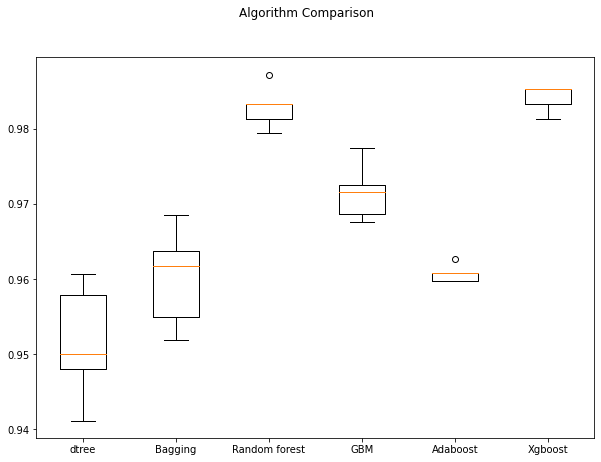

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_score_results_over)
ax.set_xticklabels(names)

plt.show()

#### Observations
1. We can see that XGBoost is giving the highest cross-validated recall followed by Adaboost and GBM for oversampled train data
2. The boxplot shows that the performance of Adaboost , GBM and xgboost for oversampled train data is consistent their performance on the validation set is also good
3. We will tune - Adaboost , GBM  and XGBoost on oversampled data and see if the performance improves.

## Undersampling train data using RandomUndersampler

In [123]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1)  ## for undersampling
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 28)
After Undersampling, the shape of train_y: (1952,) 



## 6 Models sampling with undersampled training data

In [ ]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


cv_score_results_un = []  #  list to store all  CV scores
names_un = []  #  list to store name of the models
val_recall_score_un = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance undersampled data:" "\n")
for name, model in models_un:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_un = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    cv_score_results_un.append(cv_result_un)
    names_un.append(name)
    print("{}: {}".format(name, cv_result_un.mean() * 100))

print("\n" "Validation Performance undersampled data:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    print(name)
    print("\n")
    val_perf_un = model_performance(model, X_val, y_val)
    print(val_perf_un)
    print("\n")
    scores_un = recall_score(y_val, model.predict(X_val))
    val_recall_score_un.append(scores_un)
    print("{}: {}".format(name + "_recall", scores_un))
    print("\n")


Cross-Validation Performance undersampled data:

dtree: 89.2422815279958
Bagging: 91.1883830455259
Random forest: 93.03506017791732
GBM: 93.85295656724229
Adaboost: 93.23966509680795
Xgboost: 95.08267922553637

Validation Performance undersampled data:

dtree


   Accuracy  Recall  Precision    F1
0     0.893   0.908      0.614 0.733


dtree_recall: 0.9079754601226994


Bagging


   Accuracy  Recall  Precision    F1
0     0.924   0.929      0.698 0.797


Bagging_recall: 0.9294478527607362


Random forest


   Accuracy  Recall  Precision    F1
0     0.932   0.939      0.723 0.817


Random forest_recall: 0.9386503067484663


GBM


   Accuracy  Recall  Precision    F1
0     0.937   0.960      0.731 0.830


GBM_recall: 0.9601226993865031


Adaboost


   Accuracy  Recall  Precision    F1
0     0.929   0.960      0.705 0.813


Adaboost_recall: 0.9601226993865031


Xgboost


   Accuracy  Recall  Precision    F1
0     0.940   0.966      0.739 0.838


Xgboost_recall: 0.9662576687116564




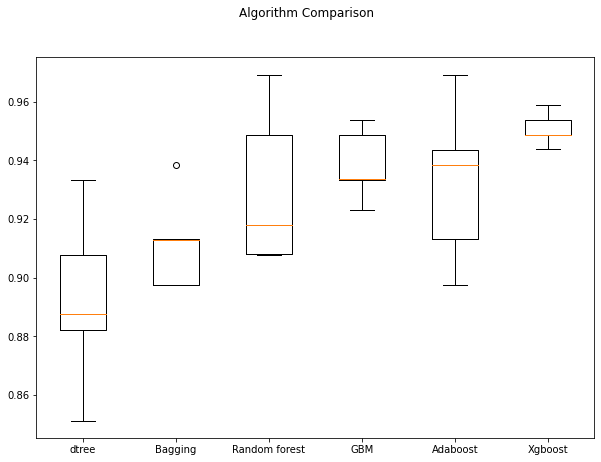

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_score_results_un)
ax.set_xticklabels(names)

plt.show()

#### Observations
1. We can see that XGBoost is giving the highest cross-validated recall followed by adaboost and GBM for undersampled train data
2. The boxplot shows that the performance of adaboost , GBM and xgboost is consistent for undersampled train data their performance on the validation set is also good
3. We will tune - Adaboost ,GBM and XGBoost for undersampled train data and see if the performance improves.

## Hyperparameter Tuning

Out of 16 models 
We will tune the following 5

1. XgBost with original data - Hyperparameter Tuning 
2. GBM with original data - Hyperparameter Tuning 


3. XgBost with undersampled data - Hyperparameter Tuning 
4. GBM with undersampled data - Hyperparameter Tuning 
5. ADABoost with undersampled data - Hyperparameter Tuning 

## XgBost with original data - Hyperparameter Tuning

In [152]:
%%time
# Choose the type of classifier. 
xgb_tuning = XGBClassifier(use_label_encoder=False,random_state=1, eval_metric='logloss',verbosity=0)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
rand_obj = RandomizedSearchCV(xgb_tuning, parameters,scoring=scorer,cv=5,n_jobs=-1,n_iter=50,random_state=1,verbose=0)

#Fitting parameters in RandomizedSearchCV
rand_obj.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rand_obj.best_params_,rand_obj.best_score_))


Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'colsample_bylevel': 1} with CV score=0.9292778649921507:
CPU times: user 3.86 s, sys: 270 ms, total: 4.13 s
Wall time: 1min 22s


In [153]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    subsample=0.9,
    learning_rate=0.05,
    colsample_bytree= 0.7,
    colsample_bylevel = 1,
    eval_metric="logloss",
    
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [154]:
# Calculating different metrics on train set
xgboost_rand_train_normal = model_performance(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_rand_train_normal

Training performance:


Accuracy  Recall  Precision    F1
0     0.970   0.995      0.846 0.914

In [155]:
# Calculating different metrics on train set
xgboost_rand_val_normal = model_performance(
    xgb_tuned1, X_val, y_val
)
print("Validation performance:")
xgboost_rand_val_normal

Validation performance:


Accuracy  Recall  Precision    F1
0     0.956   0.945      0.813 0.874

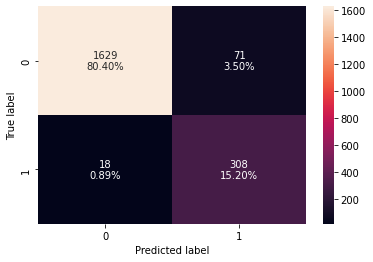

In [156]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1,X_val,y_val)

## GBM with original data - Hyperparameter Tuning

In [158]:
# Choose the type of classifier. 
gradient_tuning = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
   
    "max_features":[0.7,0.8,0.9,1],
    "n_estimators": [100,150,200,250],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
rand_obj_gbm = RandomizedSearchCV(gradient_tuning, parameters, scoring=scorer,cv=5,n_jobs=-1,n_iter=50)
#Fitting parameters in RandomizedSearchCV
rand_obj_gbm.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rand_obj_gbm.best_params_,rand_obj_gbm.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 250, 'max_features': 0.9, 'learning_rate': 0.2} with CV score=0.8596127681841967:


In [159]:
# building model with best parameters
gbm_tuned1 = GradientBoostingClassifier(
    random_state=1,
    n_estimators=250,
    max_features=0.9,
    subsample=1,
    learning_rate=0.2,
    
    
)

# Fit the model on training data
gbm_tuned1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.9,
                           n_estimators=250, random_state=1, subsample=1)

In [160]:
# Calculating different metrics on train set
gbm_rand_train_normal = model_performance(
    gbm_tuned1, X_train, y_train
)
print("Training performance:")
gbm_rand_train_normal

Training performance:


Accuracy  Recall  Precision    F1
0     0.999   0.995      0.996 0.995

In [161]:

# Calculating different metrics on train set
gbm_rand_val_normal = model_performance(
    gbm_tuned1, X_val, y_val
)
print("Validation performance:")
gbm_rand_val_normal

Validation performance:


Accuracy  Recall  Precision    F1
0     0.975   0.899      0.942 0.920

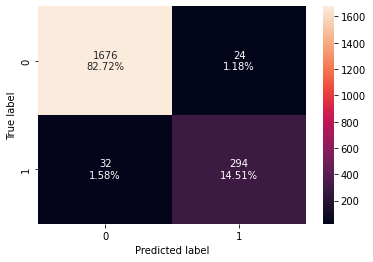

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned1,X_val,y_val)

## XGBoost with Undersampled data - Hyperparameter Tuning 

In [143]:
%%time
# Choose the type of classifier. 
xgb_tuning_un = XGBClassifier(use_label_encoder=False,random_state=1, eval_metric='logloss',verbosity=0)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
rand_obj_un = RandomizedSearchCV(xgb_tuning_un, parameters,scoring=scorer,cv=5,n_jobs=-1,n_iter=50,random_state=1,verbose=0)

#Fitting parameters in RandomizedSearchCV
rand_obj_un.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rand_obj_un.best_params_,rand_obj_un.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7} with CV score=0.986698063840921:
CPU times: user 2.6 s, sys: 94.4 ms, total: 2.7 s
Wall time: 46.7 s


In [144]:
# building model with best parameters
xgb_tuned_un = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    subsample=0.9,
    learning_rate=0.05,
    colsample_bytree= 0.7,
    colsample_bylevel = 0.7,
    eval_metric="logloss",
    
)

# Fit the model on training data
xgb_tuned_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [145]:
# Calculating different metrics on train set
xgboost_rand_train_un = model_performance(
    xgb_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
xgboost_rand_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.941   1.000      0.895 0.944

In [146]:
# Calculating different metrics on train set
xgboost_rand_val_un = model_performance(
    xgb_tuned_un, X_val, y_val
)
print("Validation performance:")
xgboost_rand_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.859   0.985      0.533 0.692

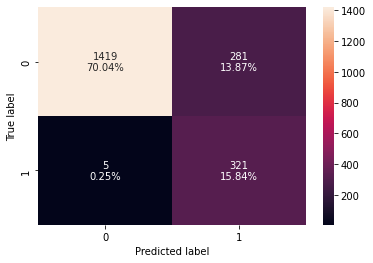

In [147]:
confusion_matrix_sklearn(xgb_tuned_un,X_val,y_val)

## GBM with Undersampled data - Hyperparameter Tuning 

In [138]:
# Choose the type of classifier. 
gradient_tuning_un = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
   "n_estimators": [100,150,200,250],
   "subsample":[0.8,0.9,1],
   "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
rand_obj_gbm_un = RandomizedSearchCV(gradient_tuning_un, parameters, scoring=scorer,cv=5,n_jobs=-1,n_iter=50)
#Fitting parameters in RandomizedSearchCV
rand_obj_gbm_un.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rand_obj_gbm_un.best_params_,rand_obj_gbm_un.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 200, 'max_features': 0.7} with CV score=0.9620931449502879:


In [139]:
# building model with best parameters
gbm_tuned_un = GradientBoostingClassifier(
    random_state=1,
    n_estimators=200,
    max_features=0.7,
    subsample=0.8,
    
    
    
)

# Fit the model on training data
gbm_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.8)

In [140]:
# Calculating different metrics on train set
gbm_rand_train_un = model_performance(
    gbm_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
gbm_rand_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.994   0.998      0.991 0.994

In [141]:
# Calculating different metrics on train set
gbm_rand_val_un = model_performance(
    gbm_tuned_un, X_val, y_val
)
print("Validation performance:")
gbm_rand_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.944   0.963      0.757 0.848

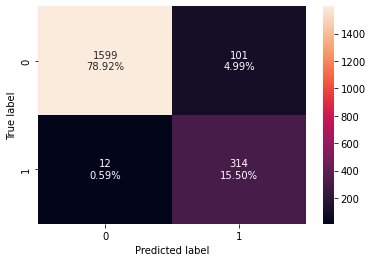

In [148]:
confusion_matrix_sklearn(gbm_tuned_un,X_val,y_val)

## ADABoost with Undersampled data - Hyperparameter Tuning 

In [124]:
# Choose the type of classifier. 
ada_boost_tunedun1 = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
     "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)],
      "n_estimators": np.arange(10,110,10),
      "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = make_scorer(recall_score)

# Run the grid search
rand_objadaun1 = RandomizedSearchCV(ada_boost_tunedun1, parameters, scoring=scorer,cv=5)
#Fitting parameters in RandomizedSearchCV
rand_objadaun1.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rand_objadaun1.best_params_,rand_objadaun1.best_score_))

Best parameters are {'n_estimators': 40, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3)} with CV score=0.9426321297749869:


In [125]:
# building model with best parameters
ada_tunedun1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=40,
    learning_rate= 0.1,
    base_estimator = DecisionTreeClassifier(max_depth=3)
  )

# Fit the model on training data
ada_tunedun1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=40, random_state=1)

In [126]:
# Calculating different metrics on train set
ada_rand_train_un1 = model_performance(
    ada_tunedun1, X_train_un, y_train_un
)
print("Training performance:")
ada_rand_train_un1

Training performance:


Accuracy  Recall  Precision    F1
0     0.967   0.975      0.960 0.967

In [127]:
# Calculating different metrics on train set
ada_rand_val_un1 = model_performance(
    ada_tunedun1, X_val, y_val
)
print("Validation performance:")
ada_rand_val_un1

Validation performance:


Accuracy  Recall  Precision    F1
0     0.932   0.957      0.717 0.820

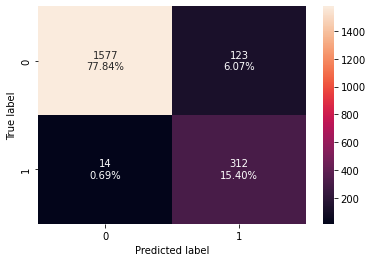

In [149]:
confusion_matrix_sklearn(ada_tunedun1,X_val,y_val)

## Comparing all the Hyperpatermeter Tuned models

In [162]:
models_train_comp_df = pd.concat(
    [xgboost_rand_train_normal.T,gbm_rand_train_normal.T,xgboost_rand_train_un.T,gbm_rand_train_un.T,ada_rand_train_un1.T],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuning with Original Data ",
    "GBM Tuning with Original Data",
    "XGBoost Tuning with Undersampled Data",
    "GBM Tuning with Undersampled Data",
    "AdaBoost Tuning with Undersampled Data",
]
models_train_comp_df

XGBoost Tuning with Original Data   GBM Tuning with Original Data  \
Accuracy                                0.970                          0.999   
Recall                                  0.995                          0.995   
Precision                               0.846                          0.996   
F1                                      0.914                          0.995   

           XGBoost Tuning with Undersampled Data  \
Accuracy                                   0.941   
Recall                                     1.000   
Precision                                  0.895   
F1                                         0.944   

           GBM Tuning with Undersampled Data  \
Accuracy                               0.994   
Recall                                 0.998   
Precision                              0.991   
F1                                     0.994   

           AdaBoost Tuning with Undersampled Data  
Accuracy                                    0.967  
Recall                                      0.975  
Precision                                   0.960  
F1                                          0.967

In [163]:
models_train_comp_df = pd.concat(
    [xgboost_rand_val_normal.T,gbm_rand_val_normal.T,xgboost_rand_val_un.T,gbm_rand_val_un.T,ada_rand_val_un1.T],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuning with Original Data ",
    "GBM Tuning with Original Data",
    "XGBoost Tuning with Undersampled Data",
    "GBM Tuning with Undersampled Data",
    "AdaBoost Tuning with Undersampled Data",
]
models_train_comp_df

XGBoost Tuning with Original Data   GBM Tuning with Original Data  \
Accuracy                                0.956                          0.975   
Recall                                  0.945                          0.899   
Precision                               0.813                          0.942   
F1                                      0.874                          0.920   

           XGBoost Tuning with Undersampled Data  \
Accuracy                                   0.859   
Recall                                     0.985   
Precision                                  0.533   
F1                                         0.692   

           GBM Tuning with Undersampled Data  \
Accuracy                               0.944   
Recall                                 0.963   
Precision                              0.757   
F1                                     0.848   

           AdaBoost Tuning with Undersampled Data  
Accuracy                                    0.932  
Recall                                      0.957  
Precision                                   0.717  
F1                                          0.820

#### Observations
1. Using RandomizedSearch GBM with hyperparameter Tuning has given a generalised performance. There may be yet better parameters which may result in a better performance.

Looks like all the models is overfitting, we will go ahead with XGB tuning.

Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model



## Performance on the test set

In [166]:
# Calculating different metrics on the test set
gbm_rand_test = model_performance(gbm_tuned1, X_test, y_test)
print("Test performance:")
gbm_rand_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.979   0.926      0.941 0.933

#### Observations
1. The recall on the test set is more than 92%, precision and accuracy are also good values.

## Feature Importance using Sklearn

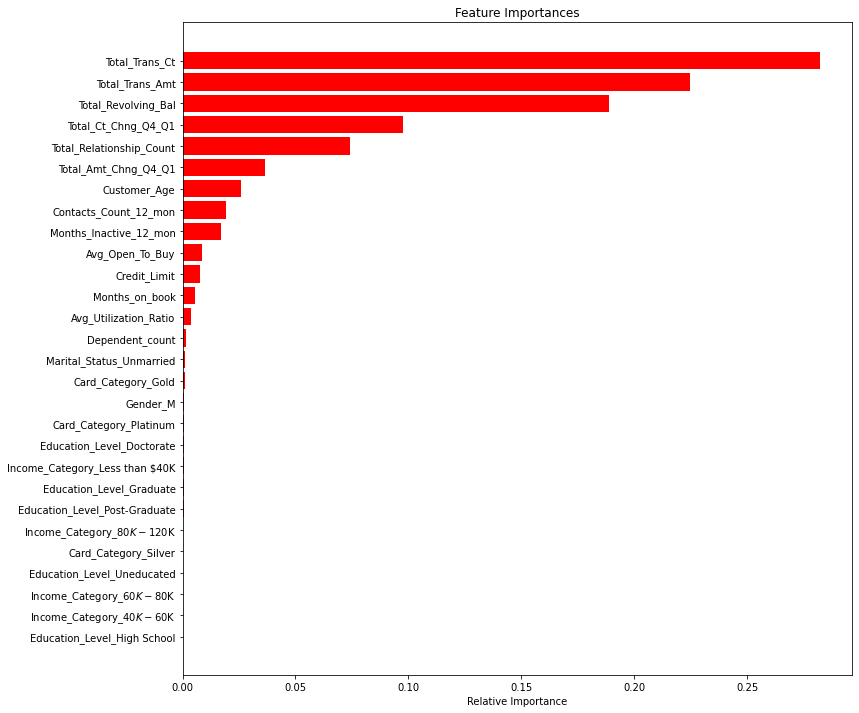

In [167]:
feature_names = X_train.columns
importances = gbm_tuned1.feature_importances_
indices = np.argsort(importances)
# checking feature importances
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
Total Transaction count is the most important feature, followed by Total Transaction Amount and Revolving Balance

## Pipelines for productionizing the model

Now, we have a final model. let's use pipelines to put the model into production

## Column Transformer

We will create 2 different pipelines, one for numerical columns and one for categorical columns. For numerical columns, we will not do  pre-processing. For categorical columns, we will do one hot encoding and missing value imputation as pre-processing We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.



In [288]:
data1 = data.copy()

In [291]:

# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer  using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "categorical_columns" to pass through the column transformer without any changes

In [292]:
# Separating target variable and other variables
X = data1.drop("Attrition_Flag", axis=1)
Y = data1["Attrition_Flag"]

In [293]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [295]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=250,
                max_features=0.9,
                subsample=1,
                learning_rate=0.2,
        ),
        )
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.2, max_features=0.9,
                                            n_estimators=250, random_state=1,
          

In [301]:
model.predict(X_test)
# transforming and predicting on test data

array([0, 1, 0, ..., 0, 0, 0])

# Business Recommendations and Insights for Bank Thera

Bank Thera should keep the following insights to understand which customer shows more attrition.

From our analysis we know that 

### "Total_Trans_Ct" vs "Attrition_Flag

This shows that customers with very low Total_Trans_Ct in the last 12 months are more likely to show attrition.
### Insights for bank thera to increase Total_Trans_Ct
Bank should make sure the customer uses it atleast a few number of times during the year.
1. Discounts
2. 0% APR cards 
3. Cashbacks
4. Easily usage in shops and online purchases 

### "Total_Trans_Amt" vs "Attrition_Flag"

This shows that customers with very low Total_Trans_Amt in the last 12 months are more likely to show attrition
### Insights for bank thera to increase Total_Trans_Amt
1. Tie ups with businesses for prodcuts
2. Travel,Accomodation , appliances etc is where they can have good tie ups so that their customers will earn points and can redeem them in various ways.

### Insights for bank thera based on income group
1. Blue Card,
Gold Card,
Silver,
Platinum, all the cards should be made more flexible with reagrds to credit_limts accross all the income groups.
2. Customers hsould be motivated to use the platinum card more.
3. Ads and campaigns should be organised where people of all incoem groups visit like malls, office complex, billboards etc.
4. Travel and hotel accomodations should be done usine points system wth related to the card type of purchase.
**Blue** - Standard flights with Standard accomodation<br>
**Gold Card**-premium flights with premium accomodation<br>
**Silver** -First class flights with First class accomodation<br>
**Platinum** -Exclusive flights with Exclusive accomodation
<br>

### Insights for bank thera based on Gender
1. The female customer grup is the place banks can make more money.
2. They cann be offered with good credit_limits, Cash_backs,
discounts etc.
3. More adds should focus on promoting platinum cards to females with 0% apr options.

### Insights for bank thera based on Marital _Status
1. Married people are more safe and will maintain the right balance and transaction counts.
2. married people will have lots of expenditure and hence they can be targeted for all the consumer items.
3. Malls, online shops are the places to catch them.
4. A good family add for the credit card uses and its benefits should be telecasted with a trusted celebrity and a good trusted director to catch the trust of family married people

### Feedbacks and customer Service
1. As the data shows that the bak is not able to solve issues it should first concentrate on customer service for retention.
2. A good feedback system should be in place.
3. AI chatbots, in office service, etc are some of the best approaches.
4. Feedback forms and emails should be let out to know what the customer needs and complaints.
5. A system to review and make the feedbacks into actionable steps have to be done by the bank Thera.